# SGD Example for Linear Regression

In [ ]:
# rye add --git https://github.com/ctgk/PRML.git prml

import seaborn as sns
import math

# Apply the default theme
sns.set_theme()


In [33]:
import prml
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression,
)


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split


def create_toy_data(func, sample_size, std, domain=[0, 1]):
    rng = np.random.default_rng()
    x = np.linspace(domain[0], domain[1], sample_size)
    # x = rng.uniform(0, 1, sample_size)
    np.random.shuffle(x)

    y = func(x) + rng.normal(scale=std, size=x.shape)
    return x, y


def sinusoidal(x):
    return np.sin(2 * np.pi * x)


m = 20
x, y = create_toy_data(sinusoidal, m, 0.25)

# Reshape x to work with sklearn (needed if x is a 1D array)
x = x.reshape(-1, 1)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# Print the shapes of the splits
print("Training set size:", x_train.shape, y_train.shape)
print("Test set size:", x_test.shape, y_test.shape)


Training set size: (14, 1) (14,)
Test set size: (6, 1) (6,)

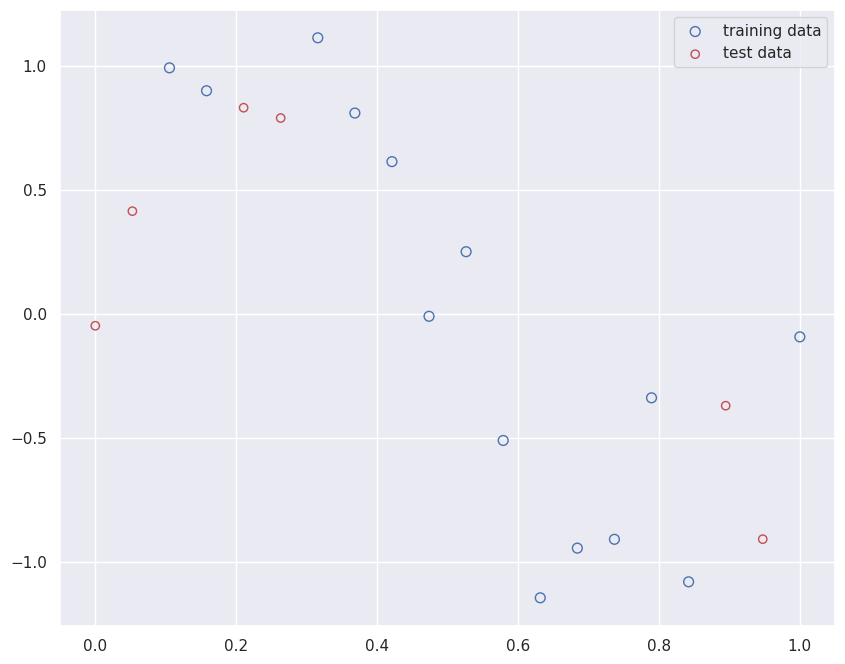

In [35]:
plt.figure(figsize=[10, 8])
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", label="test data")
plt.legend()
plt.show()

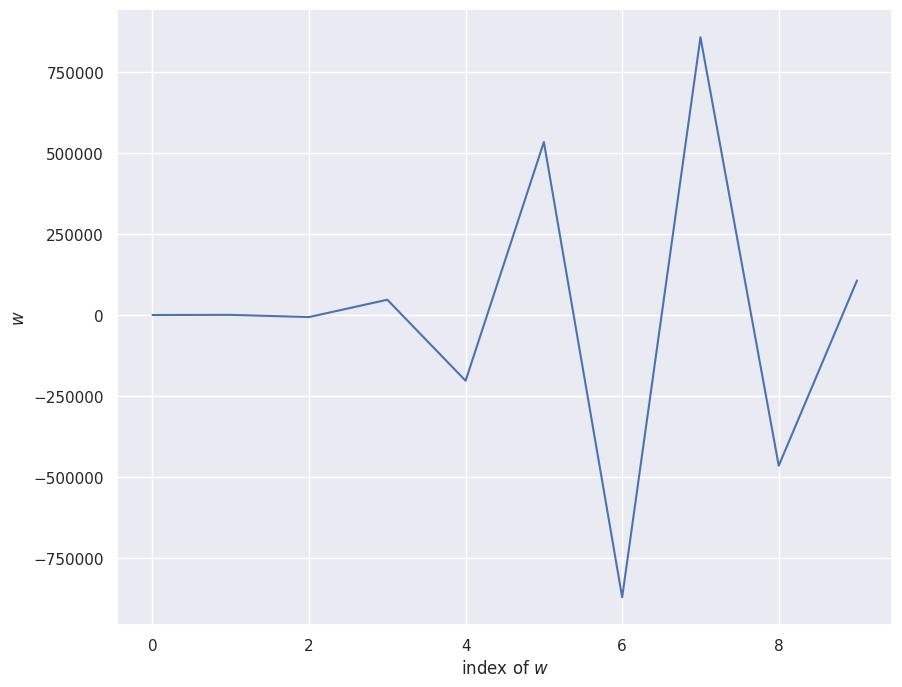

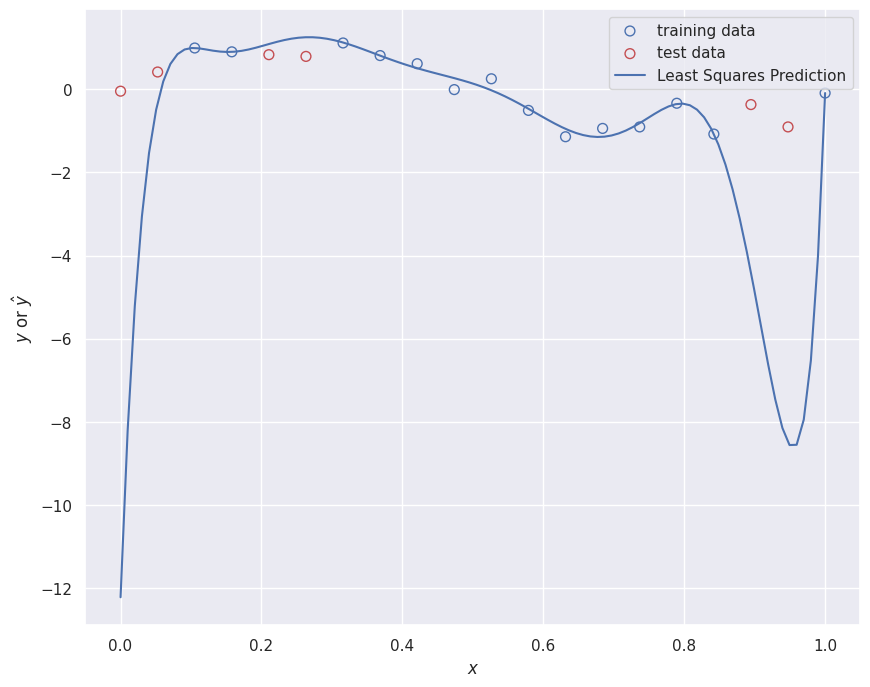

In [36]:
M = 9

feature = PolynomialFeature(M)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=[10, 8])
plt.plot(model.w)
plt.xlabel("index of $w$")
plt.ylabel("$w$")


plt.figure(figsize=[10, 8])

# training data
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
# test data
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", s=50, label="test data")

# M=9 polynomial regression hypothesis
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range = feature.transform(x_range)
y_hat_range, y_hat_range_std = model.predict(X_range, return_std=True)

plt.plot(x_range, y_hat_range, label="Least Squares Prediction")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$ or $\hat{y}$")

plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import test

import numpy as np
import matplotlib.pyplot as plt


# SGD Loop with polynomial features and mini-batch support
def sgd_loop(
    X_train,
    y_train,
    X_test,
    y_test,
    w,
    learning_rate,
    epochs,
    lambda_reg,
    n_samples,
    batch_size=1,
):
    # Arrays to store loss values for visualization
    losses = []
    test_losses = []

    # SGD Loop
    for epoch in range(epochs):
        for i in range(0, n_samples, batch_size):  # Iterate in mini-batches
            # Select a mini-batch of `batch_size`
            batch_indices = np.random.choice(n_samples, batch_size, replace=False)
            xi = X_train[batch_indices]
            yi = y_train[batch_indices]

            # Prediction
            y_pred = np.dot(xi, w)

            # Compute error
            error = y_pred - yi

            # Compute gradients (Mean of batch gradients)
            dw = (2 / batch_size) * (xi.T @ error).flatten() + 2 * lambda_reg * w

            # Update weights
            w -= learning_rate * dw

        # Compute training loss
        y_hat_train = X_train @ w
        loss = np.mean((y_hat_train - y_train) ** 2) + lambda_reg * np.sum(w**2)
        losses.append(loss)

        # Compute test loss
        y_hat_test = X_test @ w
        test_loss = np.mean((y_hat_test - y_test) ** 2) + lambda_reg * np.sum(w**2)
        test_losses.append(test_loss)

    # Plot loss vs epochs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), losses, label="Training Loss", color="blue")
    plt.plot(range(epochs), test_losses, label="Test Loss", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Test Loss vs Epochs")
    plt.legend()

    # Start of plotting regression curve
    plt.subplot(1, 2, 2)
    x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

    # computation
    hypothesis = np.zeros_like(x_range)
    for i in range(len(w)):
        hypothesis += w[i] * (x_range**i)  # Add each term: w_i * x^i

    # Plot training and testing data points
    plt.scatter(x_train, y_train, color="blue", label="Training Data")
    plt.scatter(x_test, y_test, color="red", label="Test Data")

    # plot our regression curve
    plt.plot(x_range, hypothesis, color="green", label="Regularized Hypothesis")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Regularized 9-degree Polynomial Regression Function")
    plt.legend()

    plt.tight_layout()
    plt.show()

    min_loss = min(losses)
    min_index = losses.index(min_loss)
    min_test_loss = min(test_losses)
    min_test_index = test_losses.index(min_test_loss)

    # Print final parameters
    print("Final weights:", w.flatten())
    print(f"Smallest Loss: {min_loss} loss at index {min_index}")
    print(f"Smallest Test Loss: {min_test_loss} loss at index {min_test_index}")

    return min(test_losses)


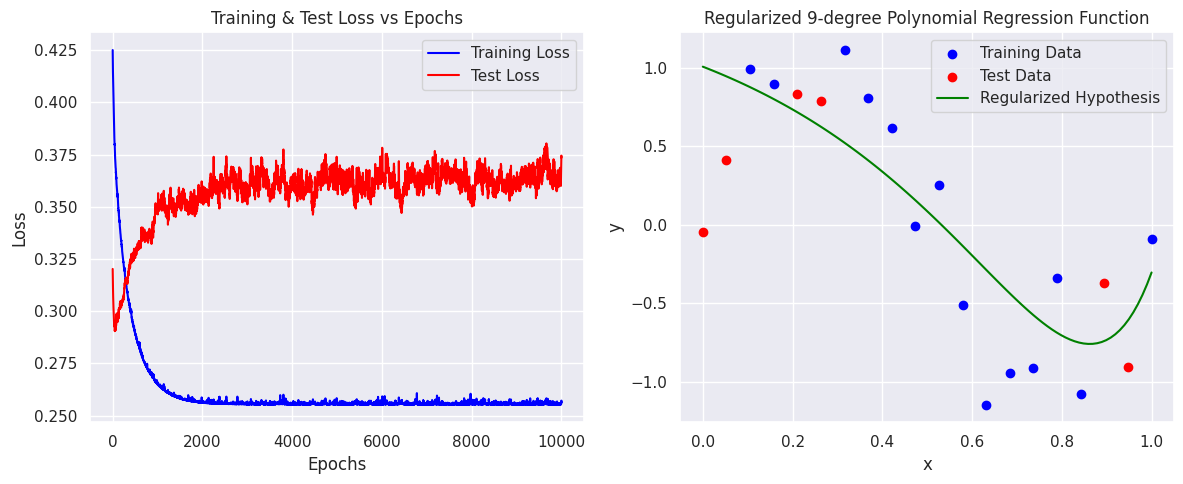

Final weights: [ 1.00604731 -1.11487521 -1.08804126 -0.67581313 -0.275726    0.03492984
  0.25939701  0.41739804  0.52790119  0.60551076]
Smallest Loss: 0.2553412747580645 loss at index 9046
Smallest Test Loss: 0.29048783420107993 loss at index 46

In [38]:
n_features = X_train.shape[1]  # Number of polynomial features

# Replace this vector with the optimal trial vector
w = np.array(
    [
        0.3821733,
        0.3096256,
        -1.87535451,
        -0.41147161,
        0.48204058,
        -0.47616227,
        -0.91596271,
        0.33230879,
        0.92623104,
        1.34749729,
    ]
)

test_loss = sgd_loop(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    w=w,
    learning_rate=0.01,
    epochs=10000,
    lambda_reg=0.02,
    n_samples=len(y_train),
    batch_size=5,
)


In [39]:
import optuna


def objective(trial):
    # Sample lambda_reg from Optuna (log-uniform for better scaling)
    lambda_reg = trial.suggest_loguniform(
        "lambda_reg", 1e-4, 1.0
    )  # Define the search space

    # batch_size = trial.suggest_uniform(
    #     "batch_size", 1, 10
    # )  # Define the search space

    # Initialize weights
    w = np.random.randn(10)

    # fix batch size to the size of the training set
    batch_size = len(y_train)

    # Run SGD
    min_test_loss = sgd_loop(
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        w=w,
        learning_rate=0.01,
        epochs=10000,
        lambda_reg=lambda_reg,
        n_samples=len(y_train),
        batch_size=batch_size,
    )

    return min_test_loss


[I 2025-02-17 18:25:31,900] A new study created in memory with name: no-name-c16d0964-4ef8-4d77-a772-67b0d7254236

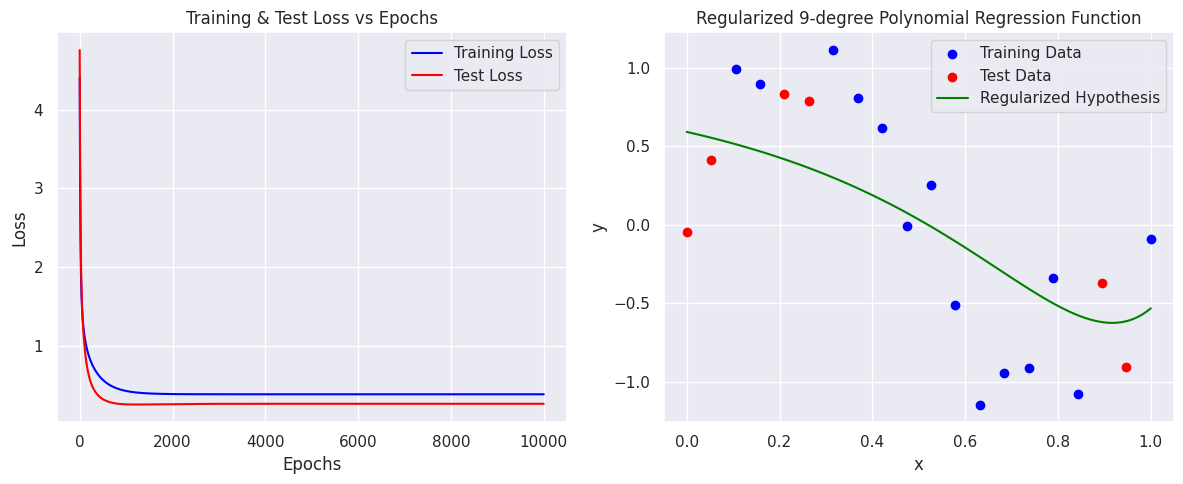

[I 2025-02-17 18:25:32,334] Trial 0 finished with value: 0.25246196417213684 and parameters: {'lambda_reg': 0.06551173706993008}. Best is trial 0 with value: 0.25246196417213684.

Final weights: [ 0.59108642 -0.67069076 -0.6428674  -0.41760298 -0.20213494 -0.032135
  0.09461629  0.18751481  0.25553166  0.30566771]
Smallest Loss: 0.38270008921907406 loss at index 9999
Smallest Test Loss: 0.25246196417213684 loss at index 1215

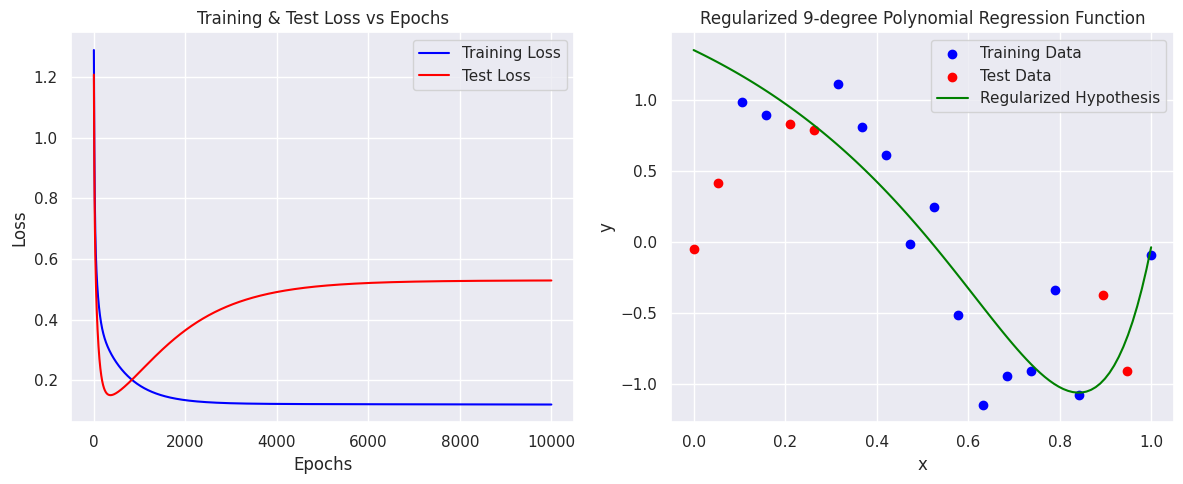

[I 2025-02-17 18:25:32,773] Trial 1 finished with value: 0.1503094754927418 and parameters: {'lambda_reg': 0.000527492459070285}. Best is trial 1 with value: 0.1503094754927418.

Final weights: [ 1.35320129 -1.5571787  -1.40869777 -1.29190934  0.47231023 -1.08174526
  0.41238338  0.33183553  1.51556294  1.21863739]
Smallest Loss: 0.11938229459412537 loss at index 9999
Smallest Test Loss: 0.1503094754927418 loss at index 363

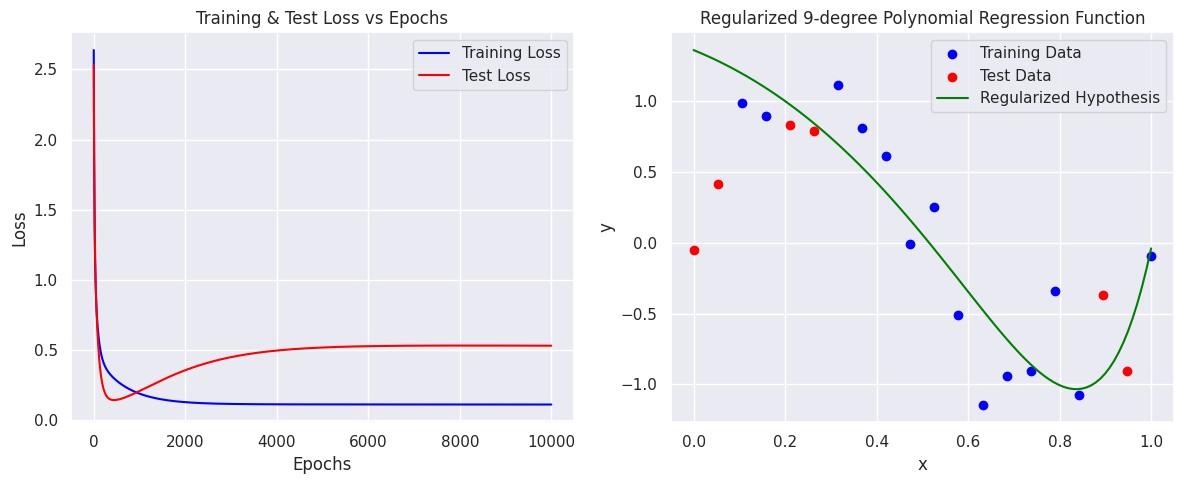

[I 2025-02-17 18:25:33,214] Trial 2 finished with value: 0.1429479584041531 and parameters: {'lambda_reg': 0.0001260654743130314}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.36199039 -1.32905763 -2.13710947 -1.42419792  1.40230044 -0.95505338
 -0.03352791  1.73474795 -0.14887173  1.48914749]
Smallest Loss: 0.11131972424053656 loss at index 9999
Smallest Test Loss: 0.1429479584041531 loss at index 442

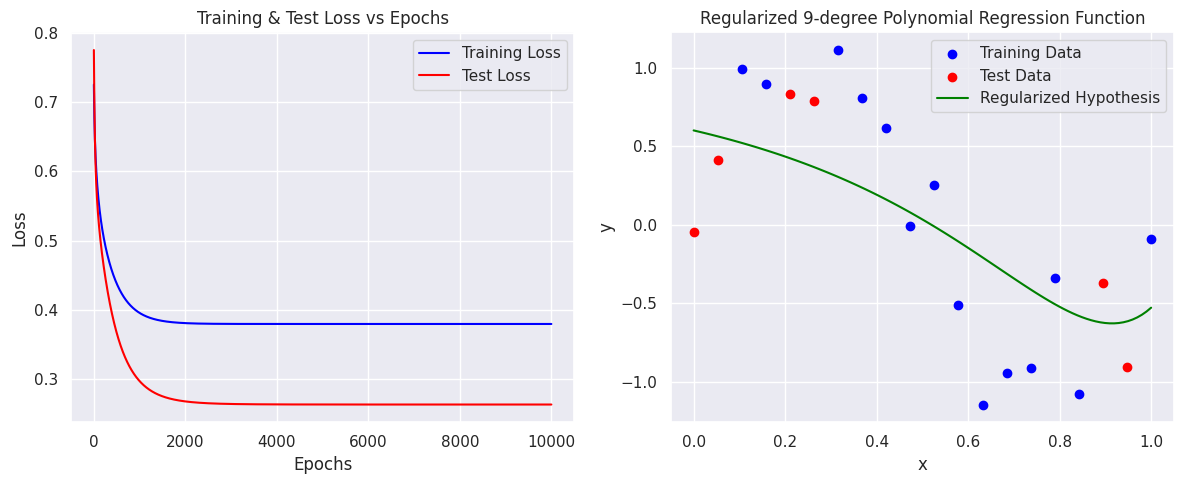

[I 2025-02-17 18:25:33,650] Trial 3 finished with value: 0.2632748599547239 and parameters: {'lambda_reg': 0.06363842011351574}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 0.60051649 -0.68191828 -0.65327481 -0.42361184 -0.20400396 -0.03080294
  0.0982605   0.19279378  0.26196391  0.31290764]
Smallest Loss: 0.3795914229287947 loss at index 9999
Smallest Test Loss: 0.2632748599547239 loss at index 9999

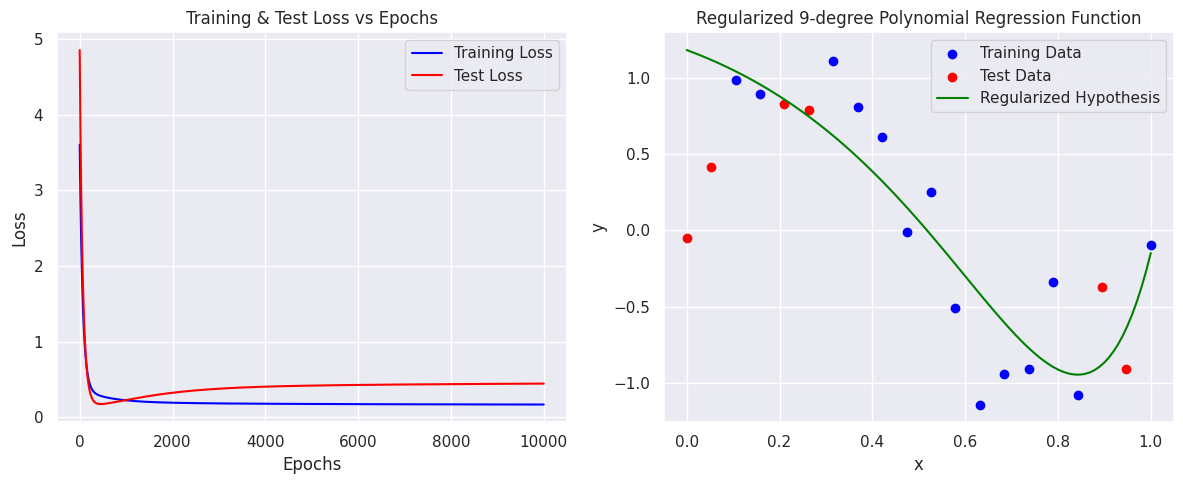

[I 2025-02-17 18:25:34,083] Trial 4 finished with value: 0.17522335391683225 and parameters: {'lambda_reg': 0.005940462779782222}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.18491207 -1.13424432 -1.67794389 -1.20576664 -0.10159442  0.13879172
  0.47694623  0.90621764  0.34554535  0.91899527]
Smallest Loss: 0.16911134145774273 loss at index 9999
Smallest Test Loss: 0.17522335391683225 loss at index 454

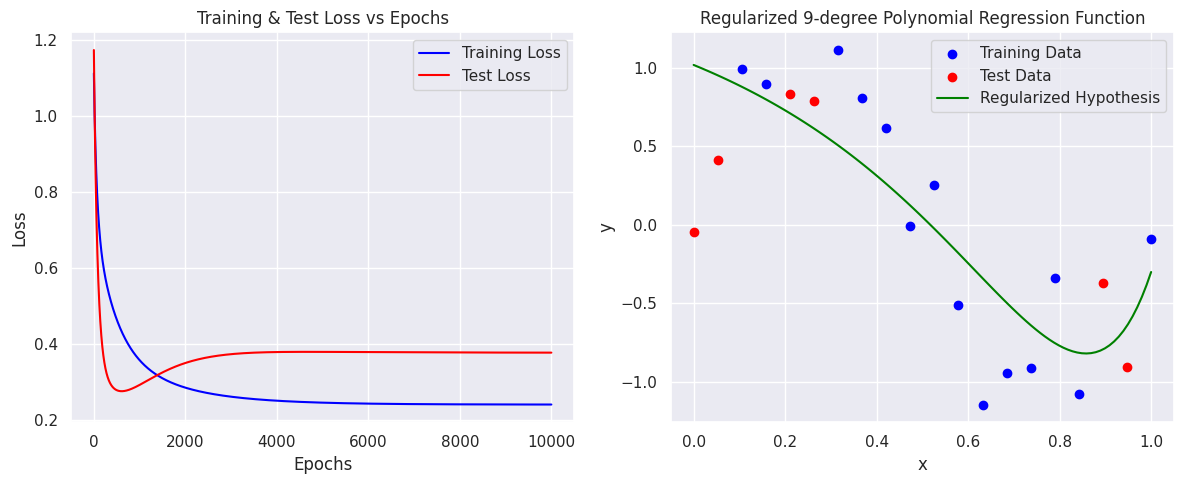

[I 2025-02-17 18:25:34,517] Trial 5 finished with value: 0.27657563927034823 and parameters: {'lambda_reg': 0.01725211991077431}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.01701494 -1.19448833 -1.09660257 -0.72192152 -0.28564637  0.02268728
  0.27397868  0.41242188  0.61934081  0.65305399]
Smallest Loss: 0.24152486137081672 loss at index 9999
Smallest Test Loss: 0.27657563927034823 loss at index 608

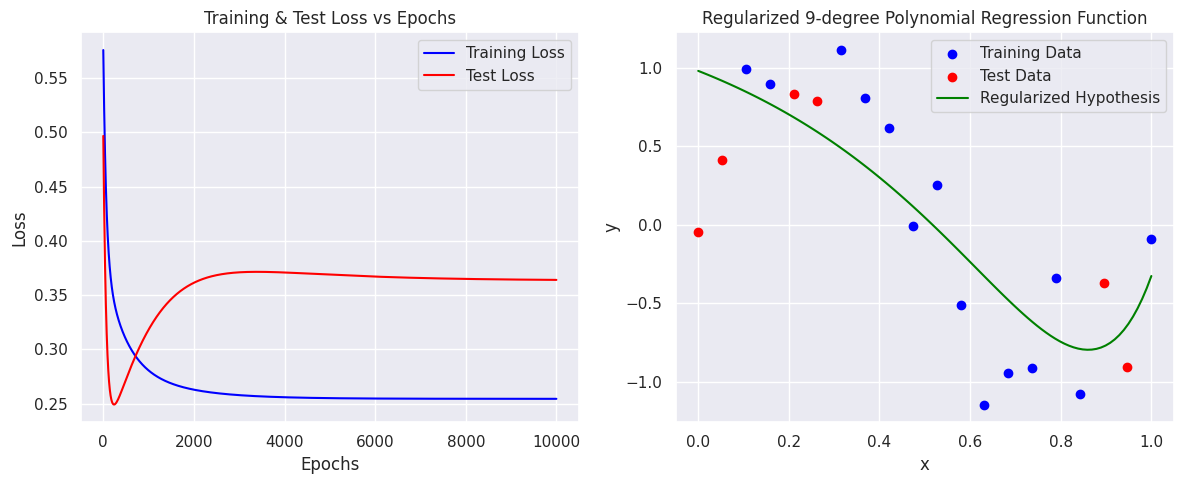

[I 2025-02-17 18:25:34,986] Trial 6 finished with value: 0.24915780488417588 and parameters: {'lambda_reg': 0.019807318767494368}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 0.97924394 -1.13712702 -1.10247167 -0.66489209 -0.27412209  0.04893892
  0.26652601  0.41439017  0.5420305   0.60174322]
Smallest Loss: 0.25441306247100376 loss at index 9999
Smallest Test Loss: 0.24915780488417588 loss at index 238

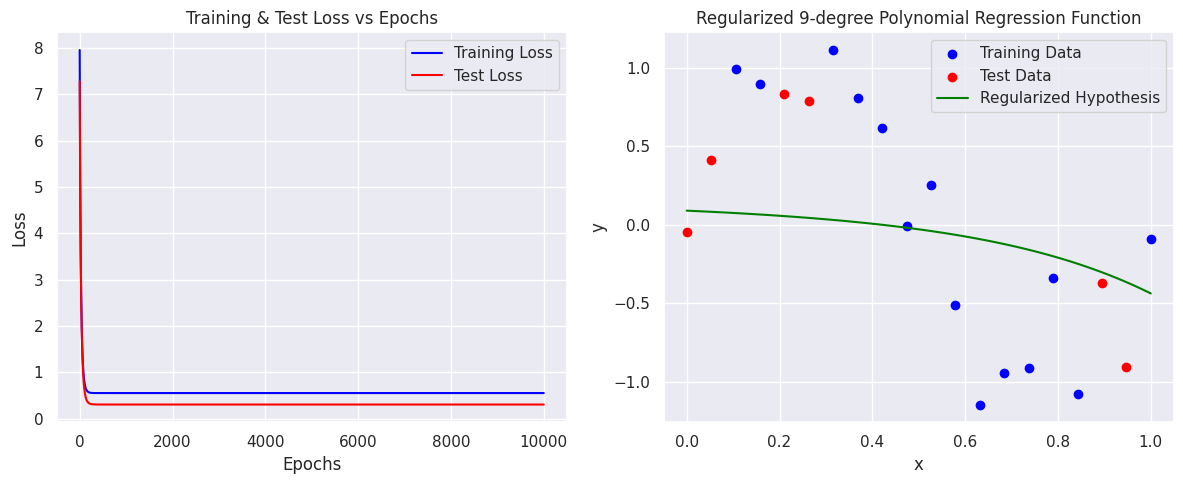

[I 2025-02-17 18:25:35,529] Trial 7 finished with value: 0.305474715814319 and parameters: {'lambda_reg': 0.666667710944612}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 0.09008183 -0.1312564  -0.13438906 -0.10365404 -0.07262511 -0.04734689
 -0.02793427 -0.01328716 -0.00225648  0.00609252]
Smallest Loss: 0.5530147050491142 loss at index 1832
Smallest Test Loss: 0.305474715814319 loss at index 2514

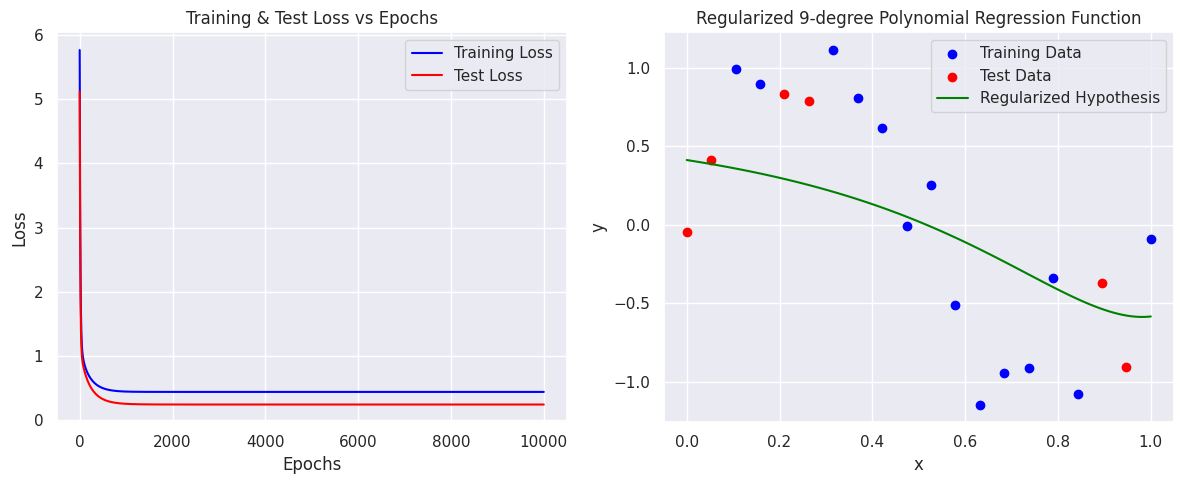

[I 2025-02-17 18:25:35,999] Trial 8 finished with value: 0.24535624845447196 and parameters: {'lambda_reg': 0.11840552797808132}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 0.41214507 -0.46219061 -0.45056745 -0.30512756 -0.16458686 -0.0527267
  0.03150354  0.09389918  0.1400811   0.17447621]
Smallest Loss: 0.4416954913174239 loss at index 8235
Smallest Test Loss: 0.24535624845447196 loss at index 9999

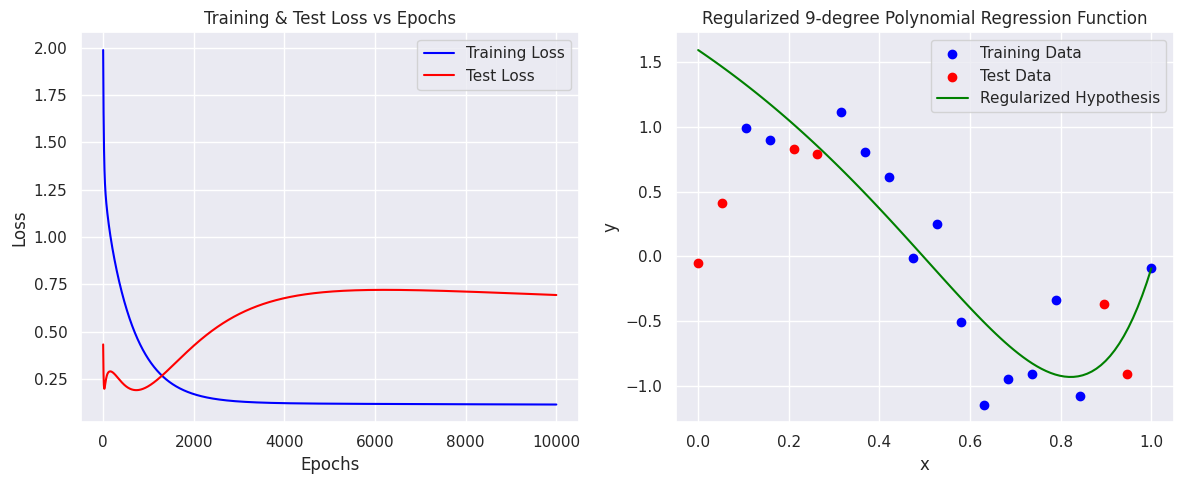

[I 2025-02-17 18:25:36,491] Trial 9 finished with value: 0.1920144603809063 and parameters: {'lambda_reg': 0.00012337235017505026}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.59247453 -2.37205758 -1.5595258  -0.67328736  0.60408925 -0.50820345
  1.63537395  0.88829477 -0.31882483  0.61973811]
Smallest Loss: 0.11611364531024686 loss at index 9999
Smallest Test Loss: 0.1920144603809063 loss at index 731

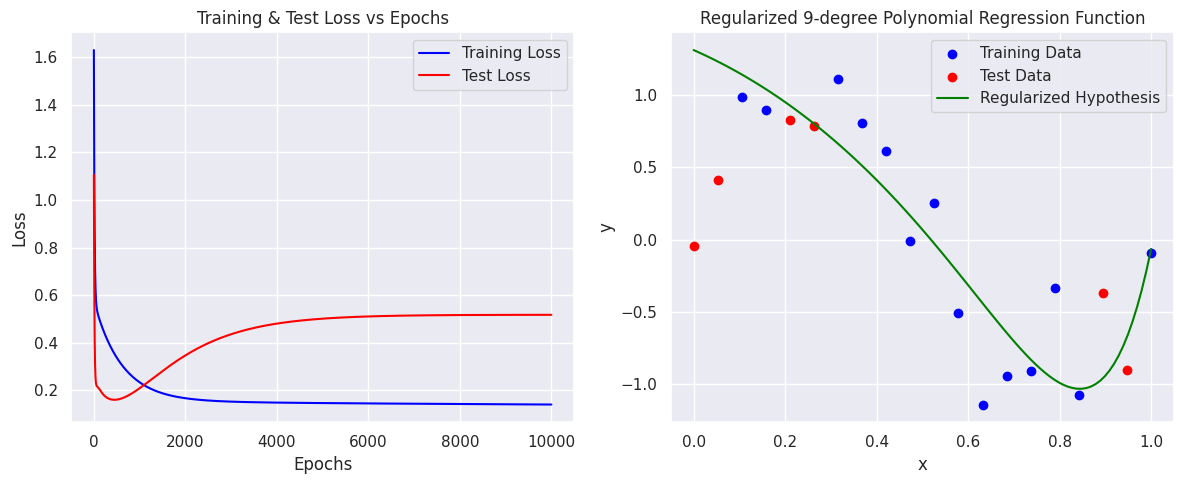

[I 2025-02-17 18:25:36,960] Trial 10 finished with value: 0.16068221730054083 and parameters: {'lambda_reg': 0.0018112435929584373}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.31322659 -1.40716837 -1.8326034  -0.79375074  0.29195613  0.24438596
 -1.62604109  1.11948638  1.13198949  1.4935107 ]
Smallest Loss: 0.14075493634587322 loss at index 9999
Smallest Test Loss: 0.16068221730054083 loss at index 449

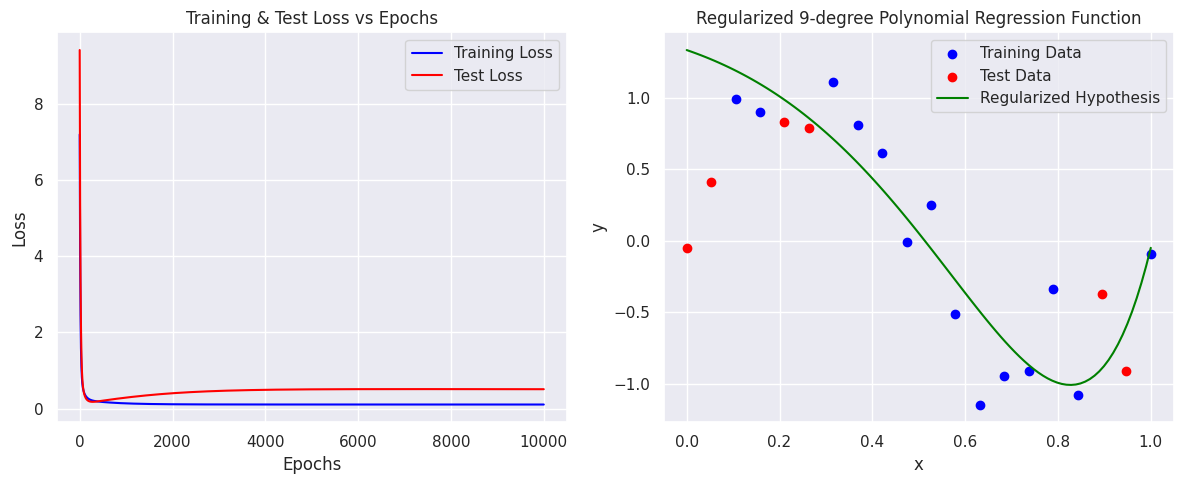

[I 2025-02-17 18:25:37,396] Trial 11 finished with value: 0.17667648368369646 and parameters: {'lambda_reg': 0.00011194249792551292}. Best is trial 2 with value: 0.1429479584041531.

Final weights: [ 1.33388788 -1.11523421 -2.16765318 -1.73533474 -0.49377034  1.16498399
  1.54364909  0.30158947  1.32751456 -0.20786508]
Smallest Loss: 0.10560722902210629 loss at index 9999
Smallest Test Loss: 0.17667648368369646 loss at index 280

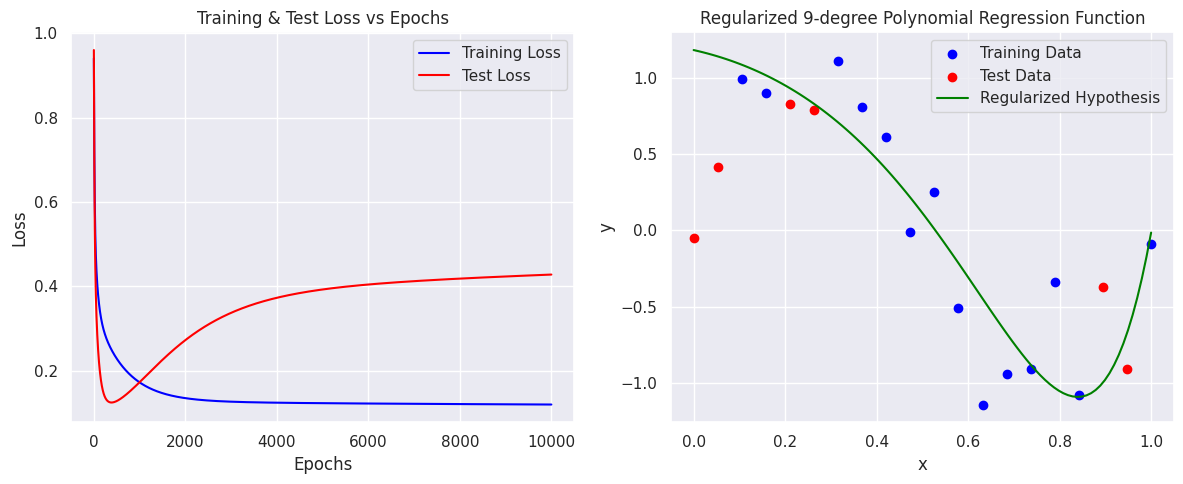

[I 2025-02-17 18:25:37,867] Trial 12 finished with value: 0.124297862143502 and parameters: {'lambda_reg': 0.0006296535963861647}. Best is trial 12 with value: 0.124297862143502.

Final weights: [ 1.18269273 -0.67352546 -2.15817267 -1.1520371  -1.04364709 -0.49061337
  0.57745943  2.31991745  0.92135974  0.50161556]
Smallest Loss: 0.11953245524099443 loss at index 9999
Smallest Test Loss: 0.124297862143502 loss at index 385

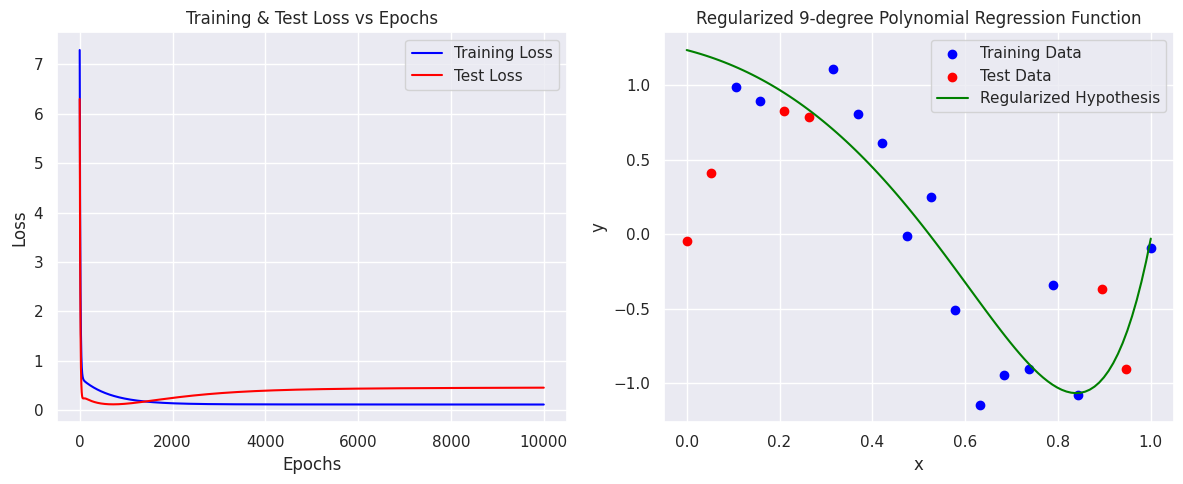

[I 2025-02-17 18:25:38,301] Trial 13 finished with value: 0.12145689134192648 and parameters: {'lambda_reg': 0.0005870033844583597}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.23786783 -0.80718737 -2.38655107 -1.41148184  0.14013061  0.06932885
  0.78278597 -0.53224978  1.96954859  0.90897909]
Smallest Loss: 0.1174251414186348 loss at index 9999
Smallest Test Loss: 0.12145689134192648 loss at index 720

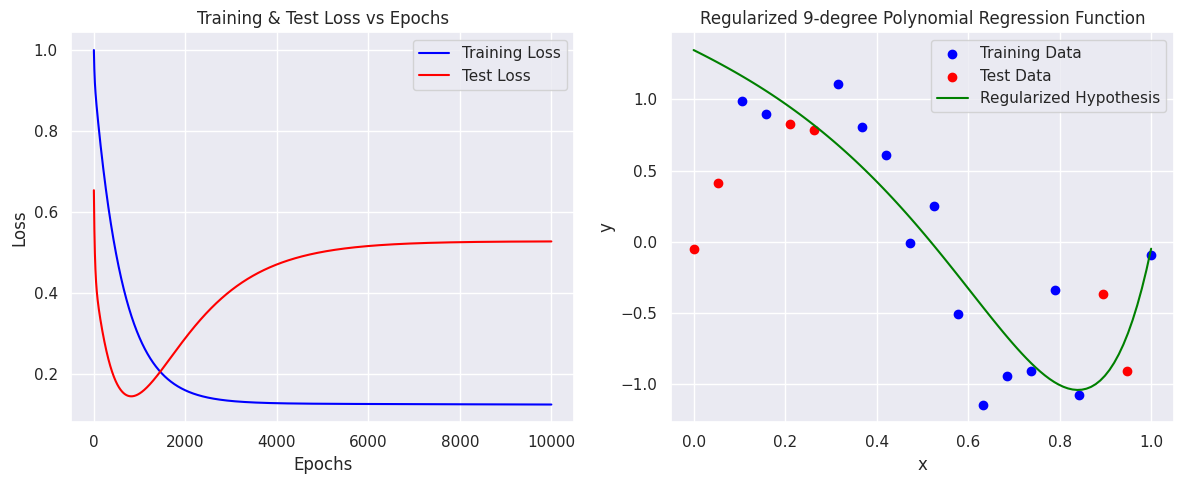

[I 2025-02-17 18:25:38,730] Trial 14 finished with value: 0.14446176302223773 and parameters: {'lambda_reg': 0.000920090992385438}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.34739362 -1.60045027 -1.02103225 -2.11031179  0.55355309 -0.07274479
 -0.39121284  1.40315442  0.55082638  1.29238225]
Smallest Loss: 0.12421856649041972 loss at index 9999
Smallest Test Loss: 0.14446176302223773 loss at index 817

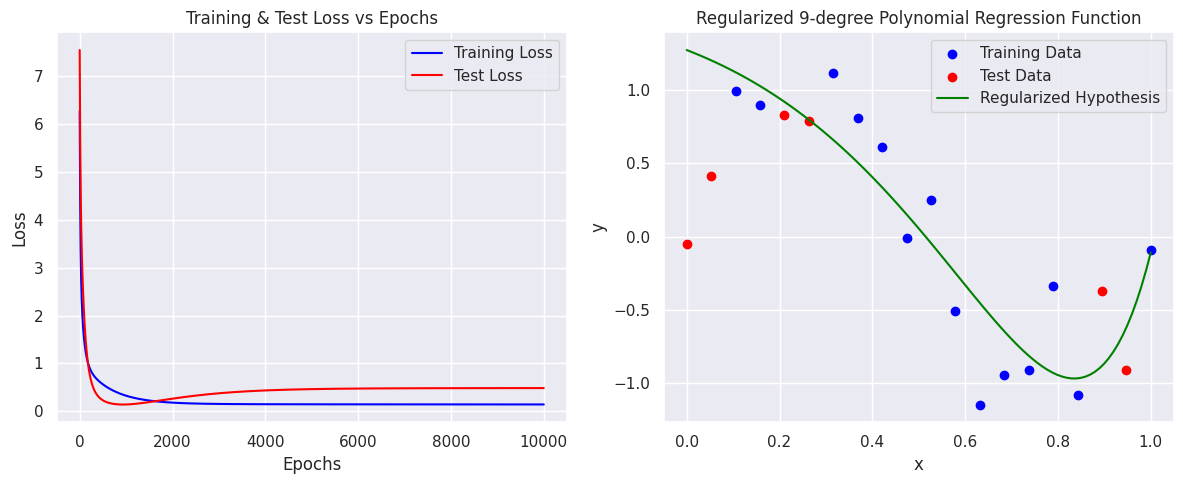

[I 2025-02-17 18:25:39,159] Trial 15 finished with value: 0.14321457257941372 and parameters: {'lambda_reg': 0.0031919712550166277}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.26964472 -1.22743179 -1.8259316  -1.40293883  0.0778588   0.02281889
  0.77809168  1.31661603  0.54356779  0.33974519]
Smallest Loss: 0.14483783187129498 loss at index 9999
Smallest Test Loss: 0.14321457257941372 loss at index 932

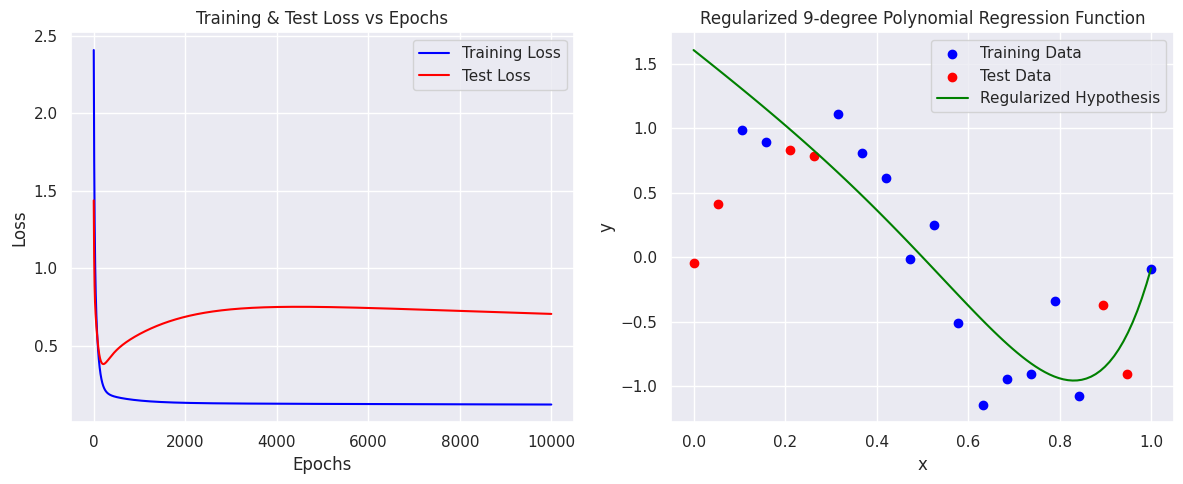

[I 2025-02-17 18:25:39,633] Trial 16 finished with value: 0.38417809917914236 and parameters: {'lambda_reg': 0.00043950817803341496}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.60866309 -2.82176009 -0.22269203 -1.15760793 -0.55871566  0.91548155
  0.3284552   0.05615636  1.12641008  0.6407245 ]
Smallest Loss: 0.12336676138428952 loss at index 9999
Smallest Test Loss: 0.38417809917914236 loss at index 210

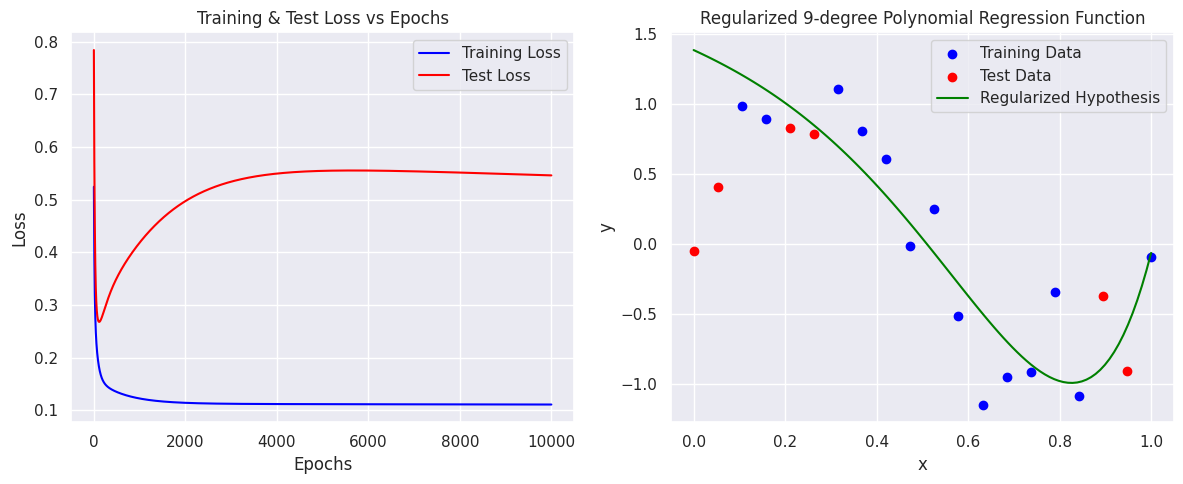

[I 2025-02-17 18:25:40,102] Trial 17 finished with value: 0.26805509388335913 and parameters: {'lambda_reg': 0.00031925018695900723}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.38842849 -1.50812766 -1.47271573 -2.13695011 -0.23688361  0.48975028
  2.54744623  0.00692498  0.91008099 -0.04839568]
Smallest Loss: 0.11114223485702043 loss at index 9999
Smallest Test Loss: 0.26805509388335913 loss at index 116

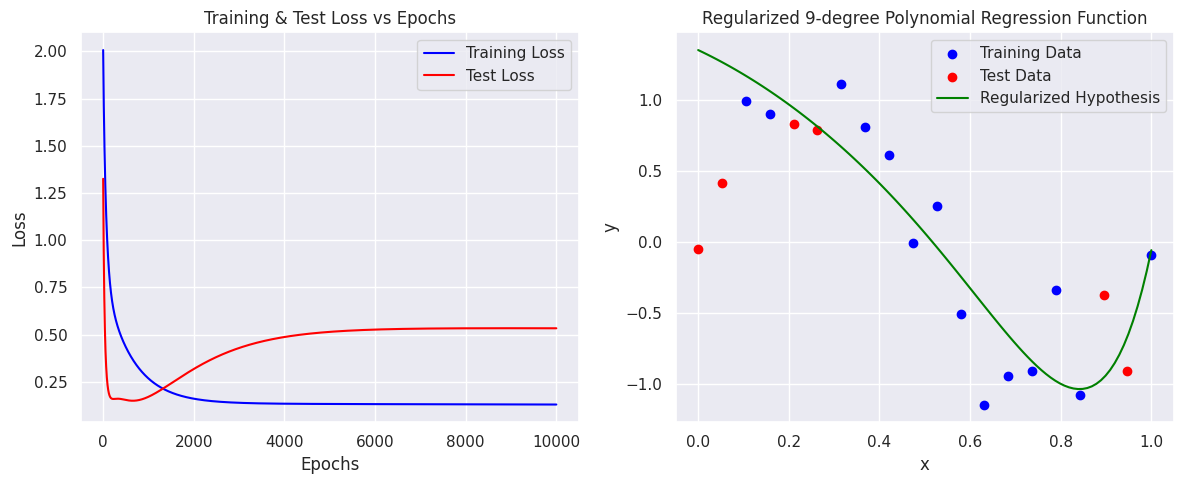

[I 2025-02-17 18:25:40,561] Trial 18 finished with value: 0.1502167211741257 and parameters: {'lambda_reg': 0.001207040340174549}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.35107439 -1.51010501 -2.00022006 -0.04298342  0.02663998 -1.58828993
  0.40325755  1.21405552  0.90100478  1.18876891]
Smallest Loss: 0.13016743652431728 loss at index 9999
Smallest Test Loss: 0.1502167211741257 loss at index 653

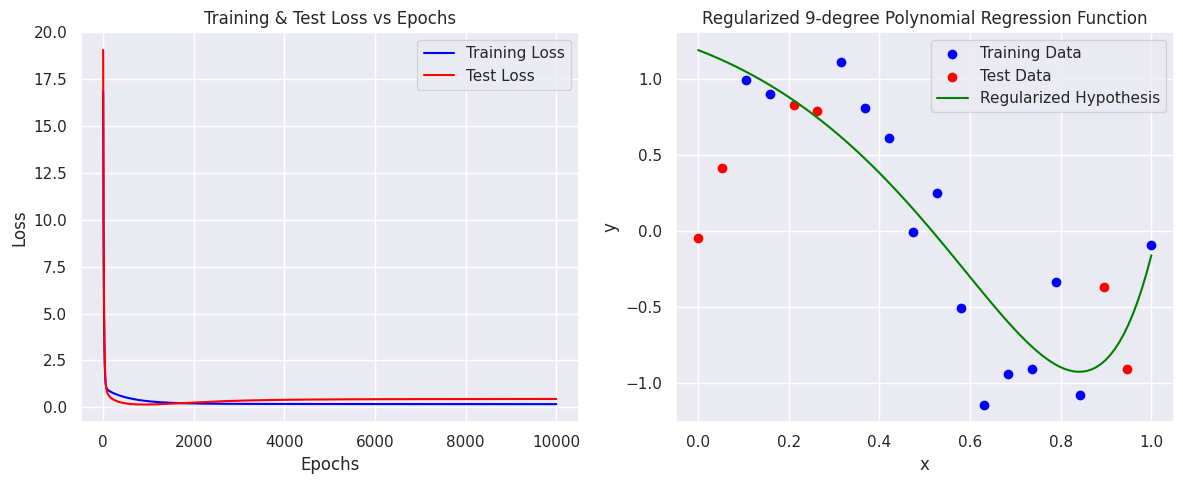

[I 2025-02-17 18:25:41,205] Trial 19 finished with value: 0.15065376841297723 and parameters: {'lambda_reg': 0.006358048627690284}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.18999832 -1.15296319 -1.77309694 -1.01223795 -0.24954774  0.26367397
  0.63009309  0.81334958  0.48079923  0.64904513]
Smallest Loss: 0.17169814124057203 loss at index 9999
Smallest Test Loss: 0.15065376841297723 loss at index 907

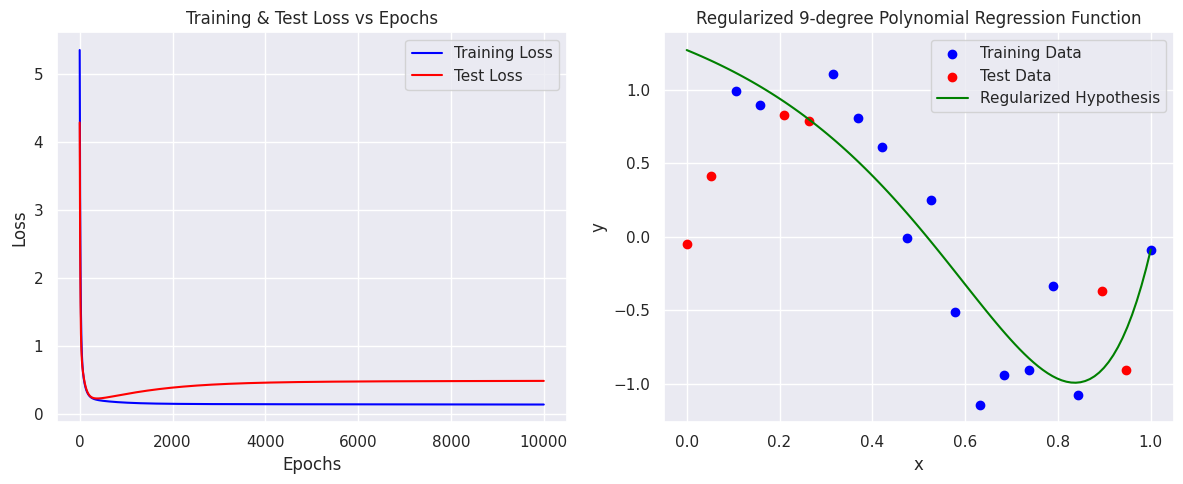

[I 2025-02-17 18:25:41,635] Trial 20 finished with value: 0.22935194835783512 and parameters: {'lambda_reg': 0.0025495711664685187}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.27312955 -1.29709437 -1.48314805 -1.32385483 -1.16416981  0.83651835
  0.96501531  0.63775207  1.26011158  0.20880487]
Smallest Loss: 0.14033273902962862 loss at index 9999
Smallest Test Loss: 0.22935194835783512 loss at index 379

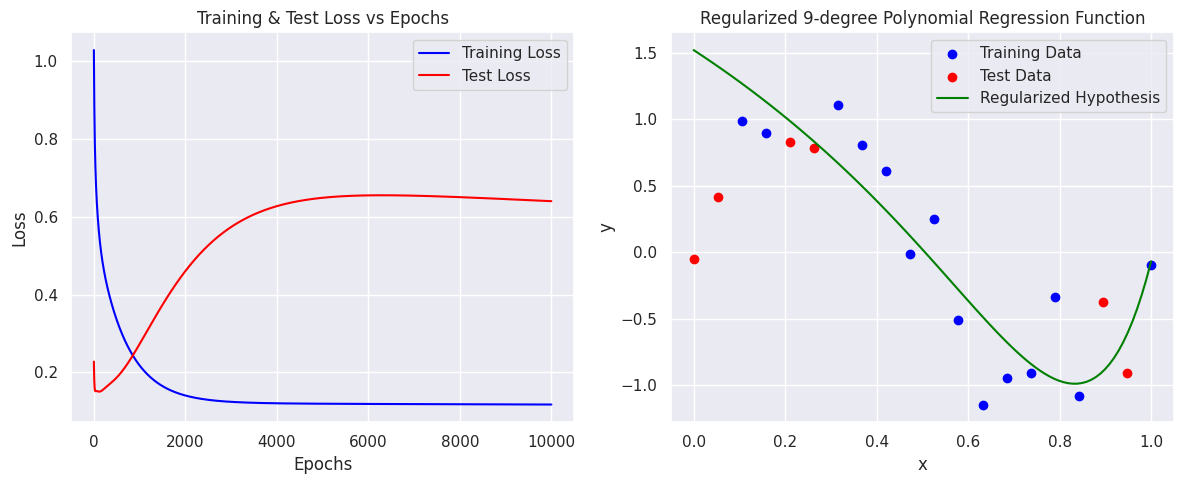

[I 2025-02-17 18:25:42,069] Trial 21 finished with value: 0.15013153939524324 and parameters: {'lambda_reg': 0.00026115142586954123}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.52147572 -2.25089985 -1.23349197 -0.50021773 -0.07772904 -0.52584946
  0.50074312  0.53790993  1.65826381  0.30280693]
Smallest Loss: 0.11698130535007868 loss at index 9999
Smallest Test Loss: 0.15013153939524324 loss at index 117

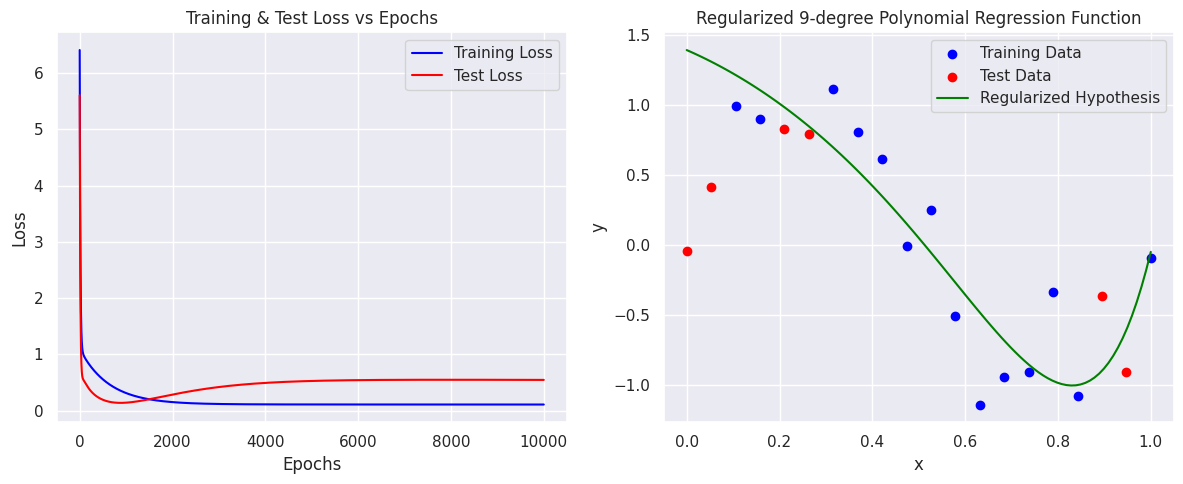

[I 2025-02-17 18:25:42,498] Trial 22 finished with value: 0.13972618291642752 and parameters: {'lambda_reg': 0.00017602881808594965}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.39137104 -1.45155365 -2.24858128 -0.17046355 -0.99797862 -0.07200211
  0.80476337  1.77042135  1.01207197 -0.08979457]
Smallest Loss: 0.11028388356672039 loss at index 9999
Smallest Test Loss: 0.13972618291642752 loss at index 880

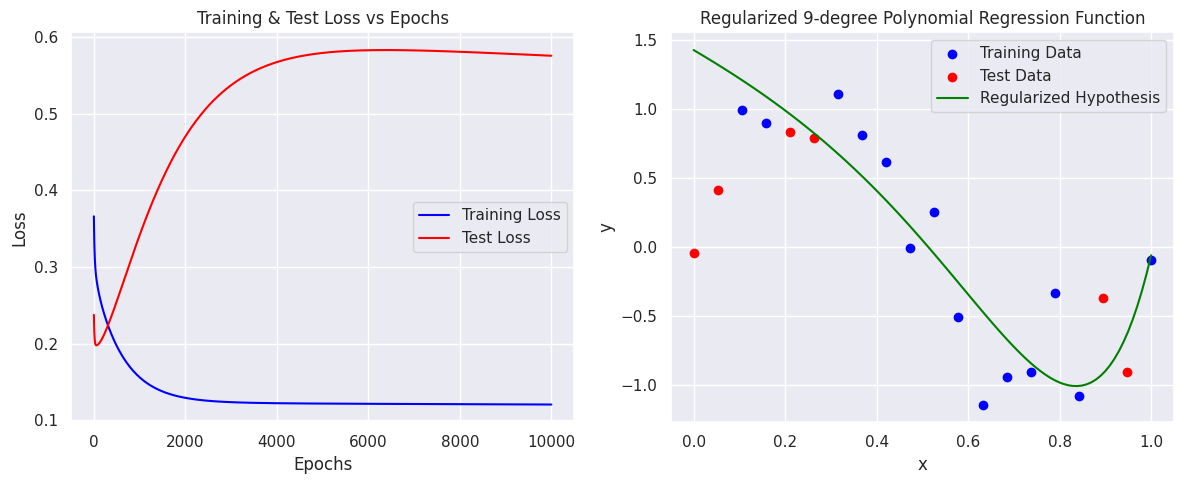

[I 2025-02-17 18:25:42,955] Trial 23 finished with value: 0.19774991117601984 and parameters: {'lambda_reg': 0.0007478861868999428}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.4272269  -1.95529154 -0.85524885 -1.55841138 -0.12315809 -0.40855319
  1.02590412  1.13333651  0.24067715  1.01273616]
Smallest Loss: 0.12059603259591022 loss at index 9999
Smallest Test Loss: 0.19774991117601984 loss at index 55

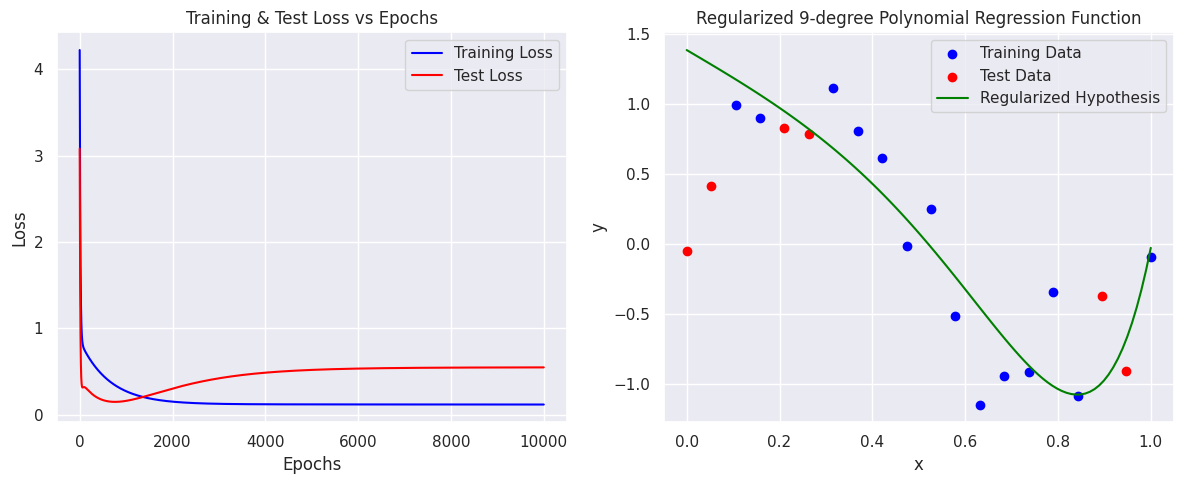

[I 2025-02-17 18:25:43,399] Trial 24 finished with value: 0.14984873749030406 and parameters: {'lambda_reg': 0.00024722641828542693}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.38527374 -1.94550384 -0.13311081 -1.99720579 -1.66972522  1.49363516
 -0.48613642  1.95933266 -0.79309391  2.16073995]
Smallest Loss: 0.11911804371129281 loss at index 9999
Smallest Test Loss: 0.14984873749030406 loss at index 761

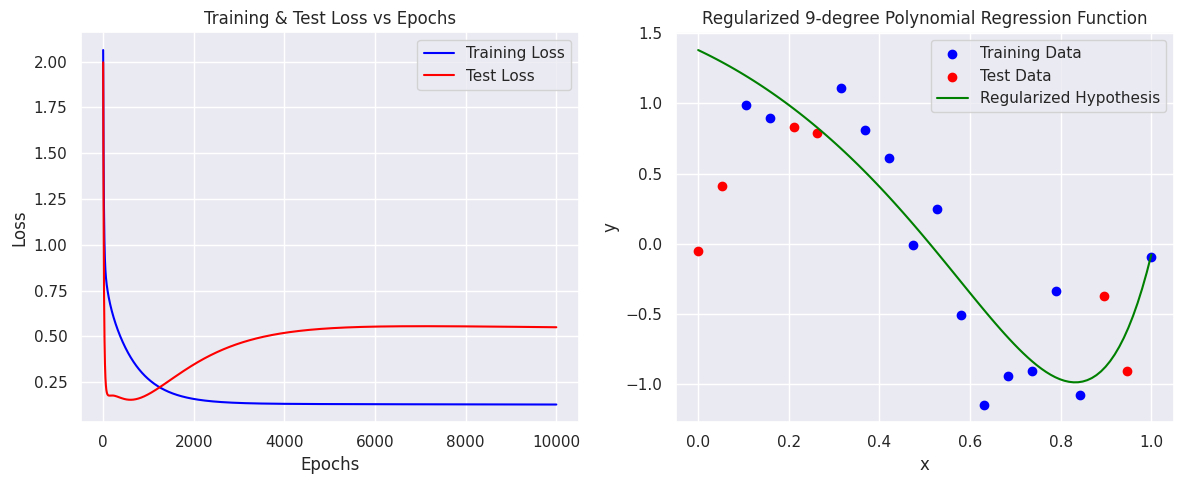

[I 2025-02-17 18:25:43,842] Trial 25 finished with value: 0.15386601091709792 and parameters: {'lambda_reg': 0.0012166799254156424}. Best is trial 13 with value: 0.12145689134192648.

Final weights: [ 1.37872524 -1.52132398 -2.11518844 -0.02267119 -1.43026771  0.98415076
 -0.11180553  1.57948579  1.22105504 -0.03854931]
Smallest Loss: 0.12798424650251297 loss at index 9999
Smallest Test Loss: 0.15386601091709792 loss at index 602

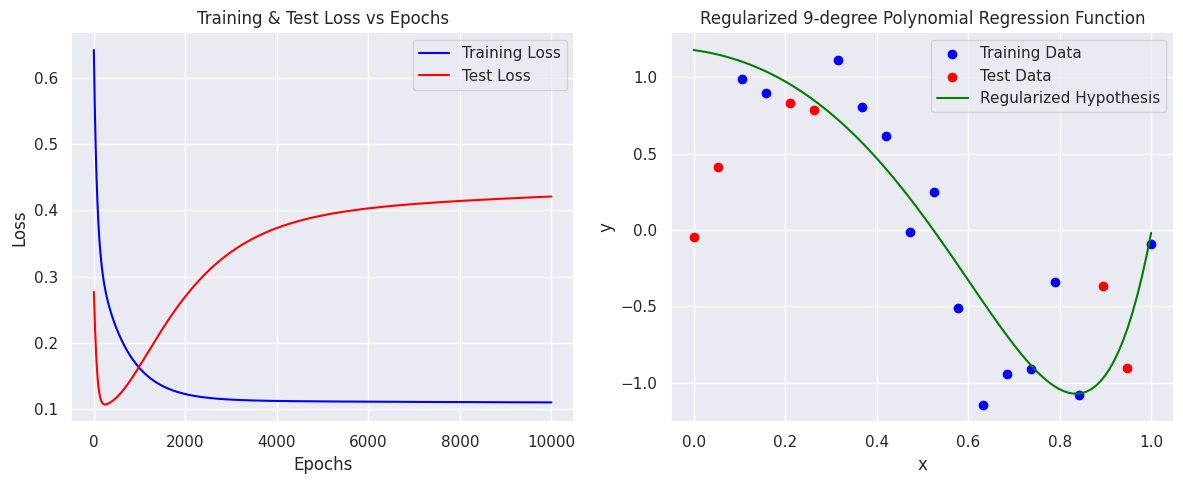

[I 2025-02-17 18:25:44,323] Trial 26 finished with value: 0.10710861641647884 and parameters: {'lambda_reg': 0.0002910136121560851}. Best is trial 26 with value: 0.10710861641647884.

Final weights: [ 1.179562   -0.40699571 -2.76943241 -1.57962835 -0.83865038  1.46091299
  0.73390297  0.56554726  0.54579933  1.09064323]
Smallest Loss: 0.1103042193751269 loss at index 9999
Smallest Test Loss: 0.10710861641647884 loss at index 246

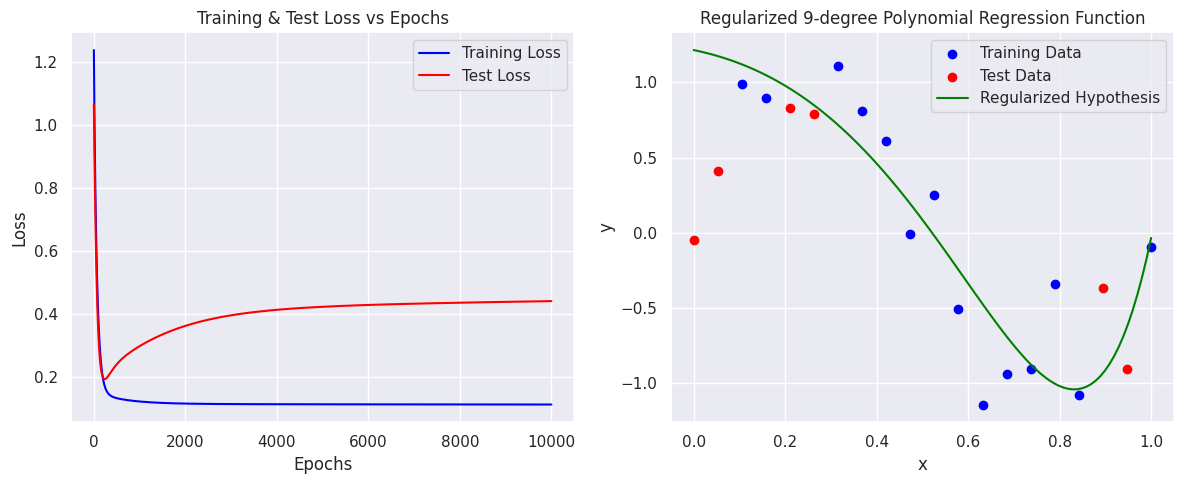

[I 2025-02-17 18:25:44,800] Trial 27 finished with value: 0.19300989244914554 and parameters: {'lambda_reg': 0.0005257496563296766}. Best is trial 26 with value: 0.10710861641647884.

Final weights: [ 1.21543381 -0.62894979 -2.38440757 -1.92679961 -0.62563298  1.01321313
  1.02230969  1.39972117  0.72127024  0.15919262]
Smallest Loss: 0.112250696830999 loss at index 9999
Smallest Test Loss: 0.19300989244914554 loss at index 237

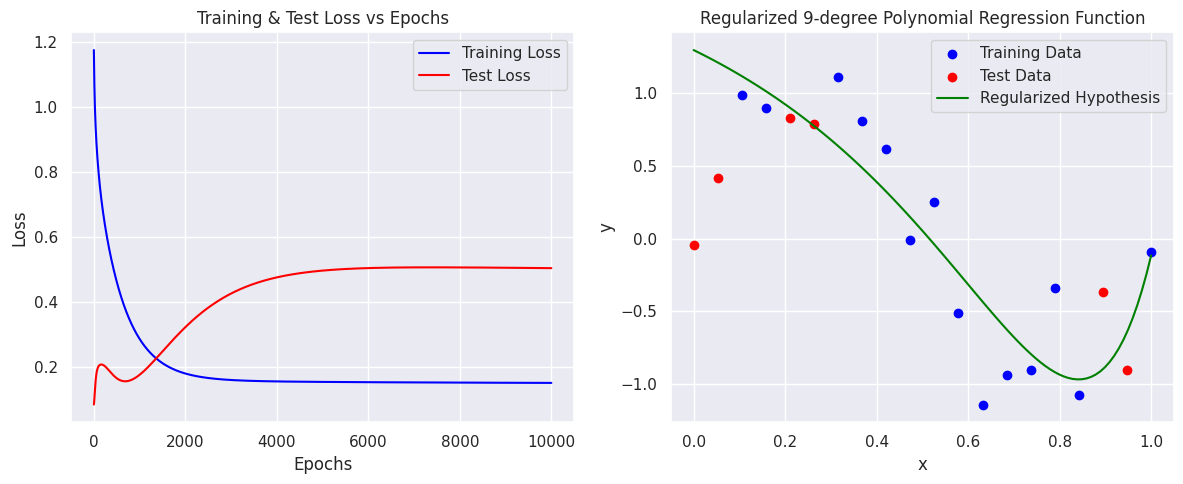

[I 2025-02-17 18:25:45,266] Trial 28 finished with value: 0.0835593658374644 and parameters: {'lambda_reg': 0.0038163140595615526}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.2977523  -1.54545044 -1.41275807 -0.92333333 -0.46641811  0.42947817
  0.23068725  0.67543139  0.34986904  1.24780922]
Smallest Loss: 0.1501523645455812 loss at index 9999
Smallest Test Loss: 0.0835593658374644 loss at index 0

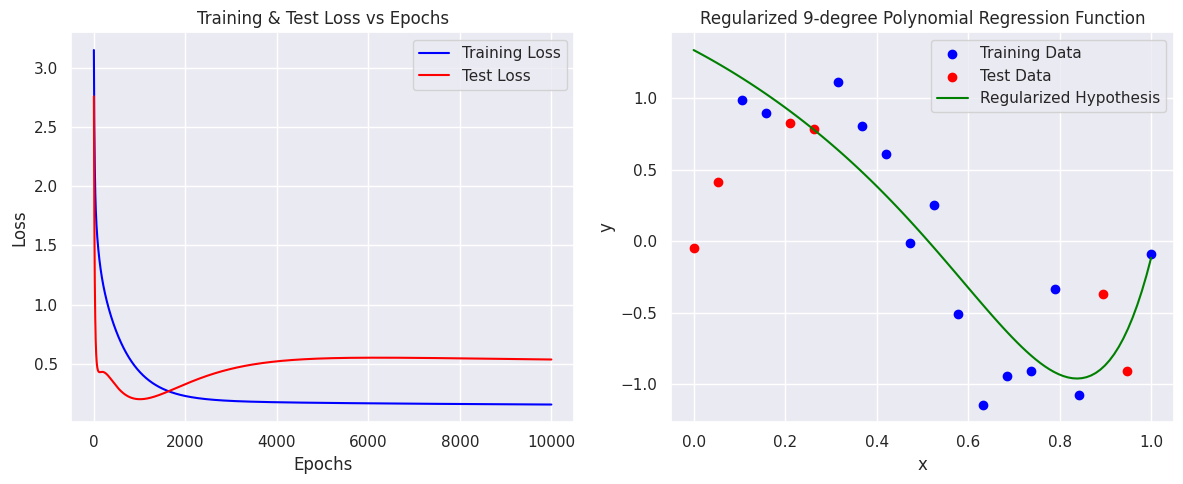

[I 2025-02-17 18:25:45,711] Trial 29 finished with value: 0.20262097696479126 and parameters: {'lambda_reg': 0.0034418777618591373}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.33815315 -1.69274176 -1.54783167 -0.02343355 -0.9852013  -0.71992138
  0.74910415  1.5926281   1.08359629  0.08922035]
Smallest Loss: 0.15767387818542675 loss at index 9999
Smallest Test Loss: 0.20262097696479126 loss at index 1009

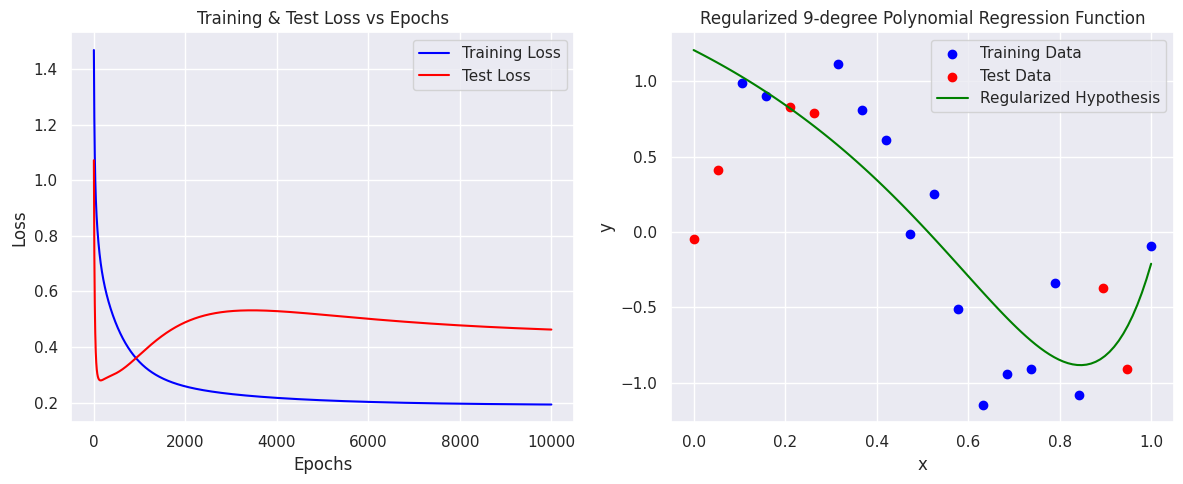

[I 2025-02-17 18:25:46,182] Trial 30 finished with value: 0.27971745046135993 and parameters: {'lambda_reg': 0.009054946537501206}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.20636456 -1.54524197 -1.21089419 -0.66787509 -0.34612356 -0.07436692
  0.52018201  0.77920122  0.40679025  0.72187849]
Smallest Loss: 0.19301786844325924 loss at index 9999
Smallest Test Loss: 0.27971745046135993 loss at index 148

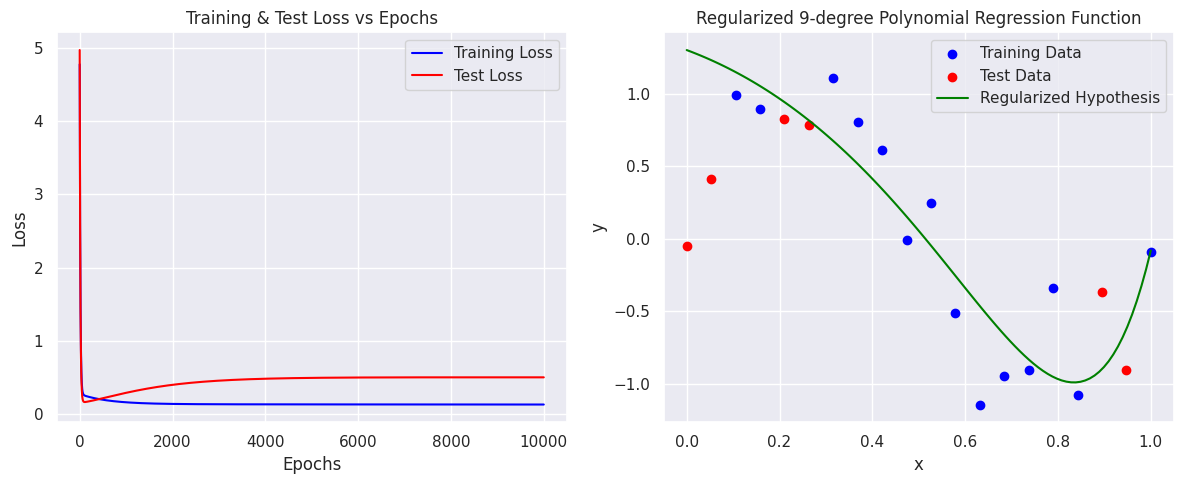

[I 2025-02-17 18:25:46,635] Trial 31 finished with value: 0.16591101019528096 and parameters: {'lambda_reg': 0.0018487990453805877}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.30304617 -1.19783703 -2.23549815 -0.73788651 -0.62430115  0.92976112
 -0.08676684  1.03578864  1.39717014  0.13593012]
Smallest Loss: 0.13190961508230709 loss at index 9999
Smallest Test Loss: 0.16591101019528096 loss at index 110

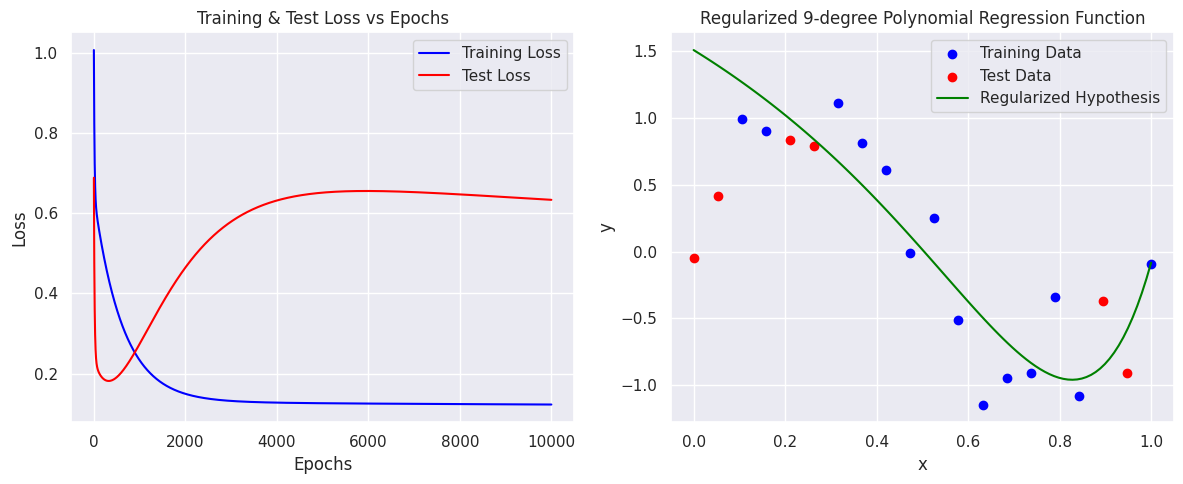

[I 2025-02-17 18:25:47,202] Trial 32 finished with value: 0.18144892405890162 and parameters: {'lambda_reg': 0.000596437633826167}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.50581269 -2.11732727 -1.39466214 -0.70950232 -0.79098473  1.54959867
 -0.43952409  0.52570629  2.39952062 -0.61184394]
Smallest Loss: 0.1226185169937624 loss at index 9999
Smallest Test Loss: 0.18144892405890162 loss at index 324

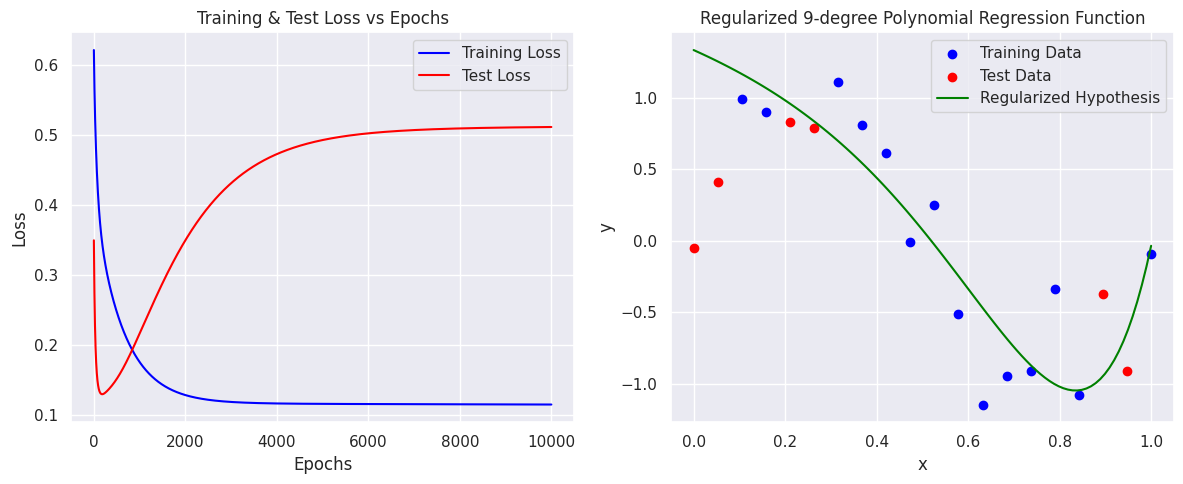

[I 2025-02-17 18:25:47,657] Trial 33 finished with value: 0.12976855845174778 and parameters: {'lambda_reg': 0.00033806107770465414}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.33187612 -1.43866961 -1.23304106 -1.603536   -0.64443061 -1.17263751
  1.99962327  2.40466554 -0.38752106  0.70874628]
Smallest Loss: 0.11502867104835734 loss at index 9999
Smallest Test Loss: 0.12976855845174778 loss at index 182

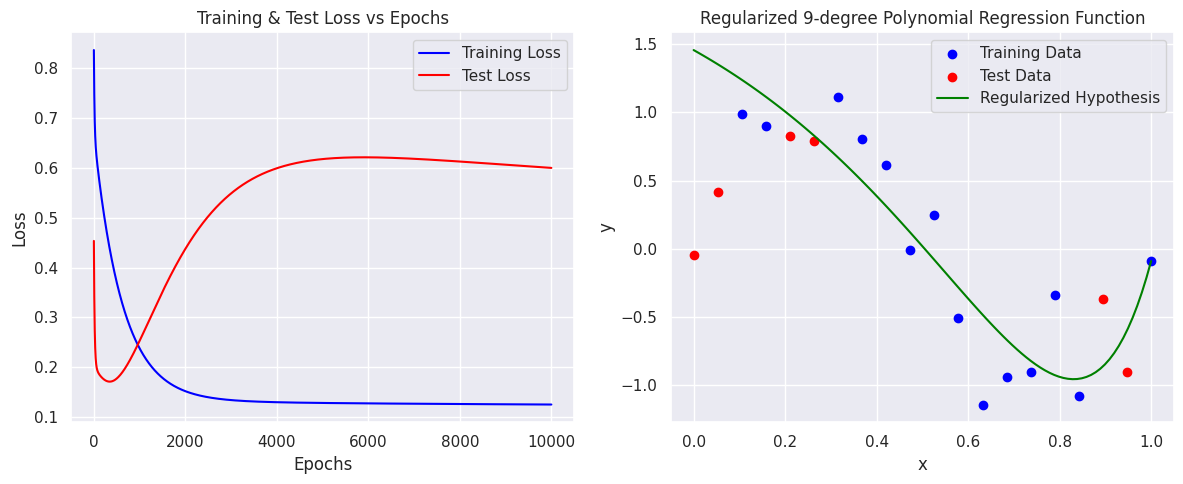

[I 2025-02-17 18:25:48,129] Trial 34 finished with value: 0.17128096058394646 and parameters: {'lambda_reg': 0.0011455811743896983}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.45769107 -1.89027593 -1.60802622 -1.19635295  0.3172238   0.72389924
  0.84665161 -0.44025778  0.92090643  0.77783559]
Smallest Loss: 0.1253878026647496 loss at index 9999
Smallest Test Loss: 0.17128096058394646 loss at index 345

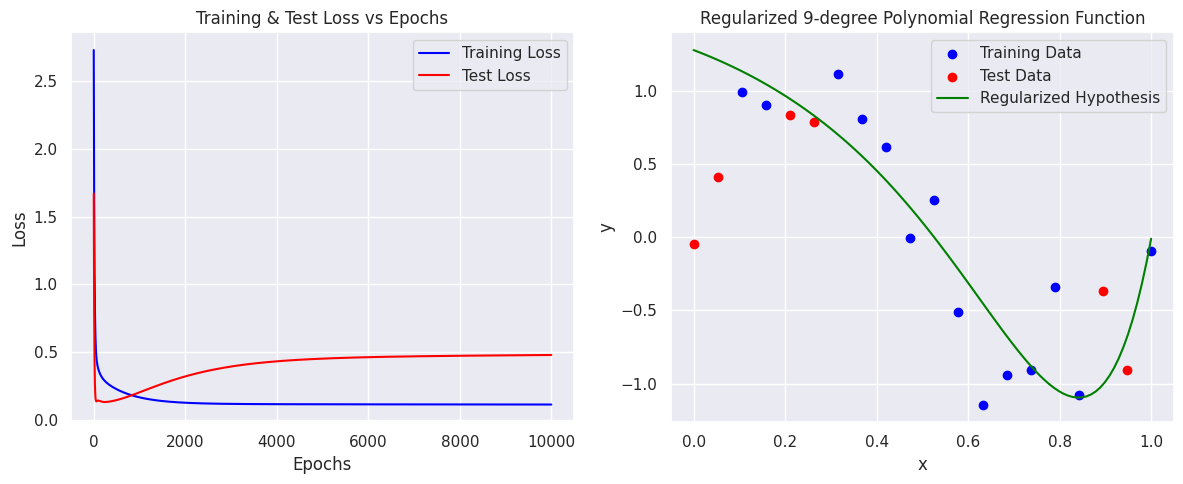

[I 2025-02-17 18:25:48,578] Trial 35 finished with value: 0.13402164572819739 and parameters: {'lambda_reg': 0.00018744558610238083}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.27695248 -1.18868382 -1.64181271 -0.73515291 -1.81386157  0.82016329
 -1.10485779  2.75927111  0.43470986  1.18188013]
Smallest Loss: 0.11564239049180272 loss at index 9999
Smallest Test Loss: 0.13402164572819739 loss at index 239

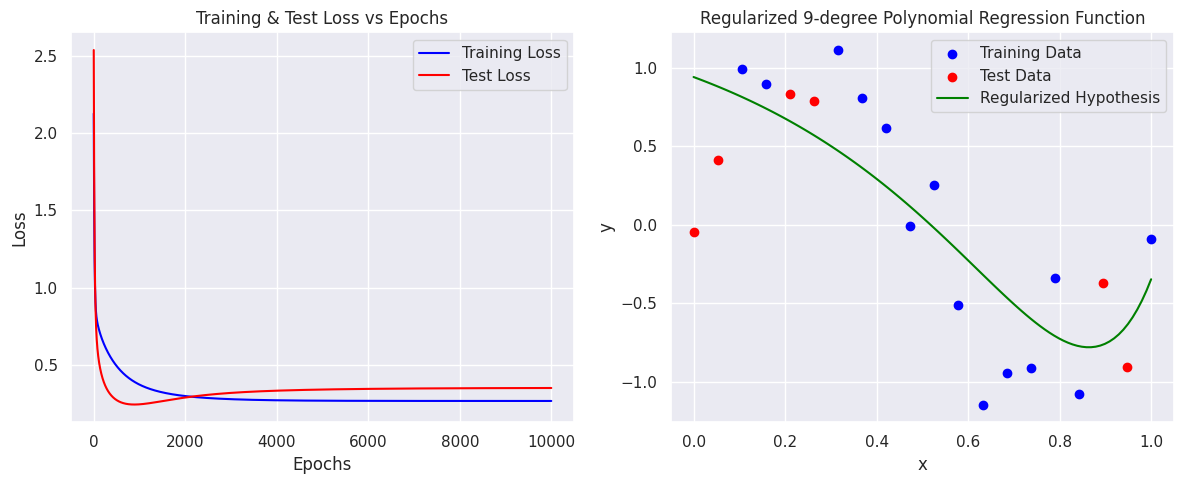

[I 2025-02-17 18:25:49,006] Trial 36 finished with value: 0.24312802169308223 and parameters: {'lambda_reg': 0.022315360236053364}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 0.94016815 -1.08127734 -1.05211825 -0.6651139  -0.27642972  0.04583092
  0.24162084  0.40462089  0.50490846  0.59139493]
Smallest Loss: 0.26618518510581557 loss at index 9999
Smallest Test Loss: 0.24312802169308223 loss at index 886

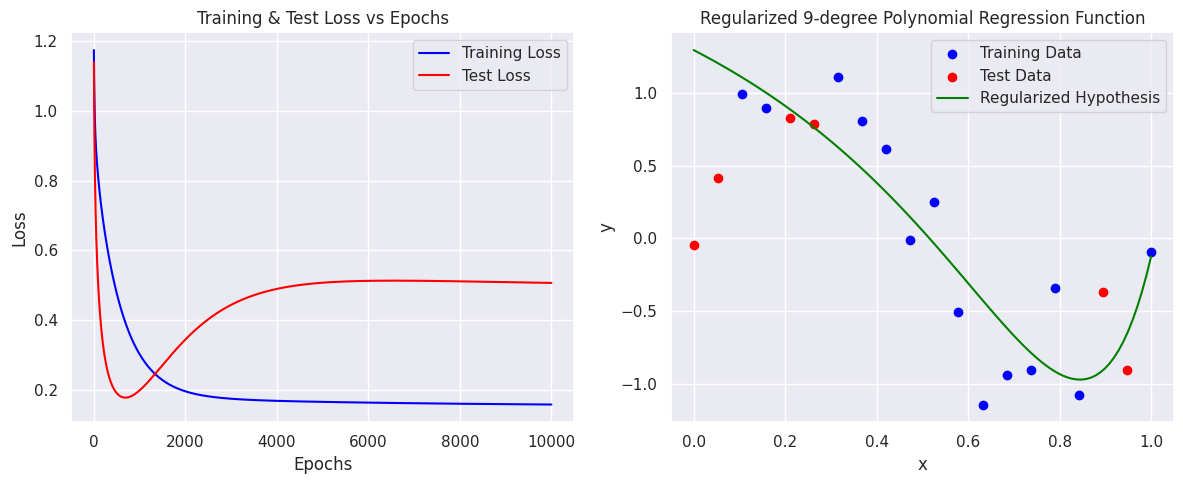

[I 2025-02-17 18:25:49,474] Trial 37 finished with value: 0.1772976620894902 and parameters: {'lambda_reg': 0.004306705143057361}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.29624153 -1.63774038 -1.21100195 -0.95838798 -0.30177795  0.3627908
  0.02942032  0.17193861  0.64669113  1.47838311]
Smallest Loss: 0.15751466455871832 loss at index 9999
Smallest Test Loss: 0.1772976620894902 loss at index 688

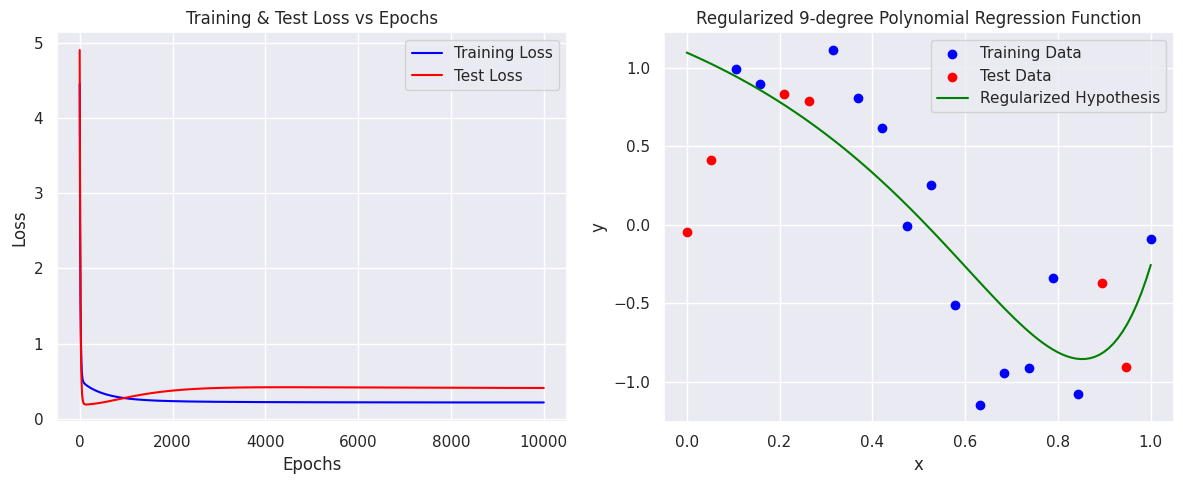

[I 2025-02-17 18:25:49,903] Trial 38 finished with value: 0.189371282647341 and parameters: {'lambda_reg': 0.012966531658960829}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.09553655 -1.29383725 -1.21791007 -0.73585394 -0.3032443   0.11768841
  0.29378004  0.42866366  0.6063125   0.75423006]
Smallest Loss: 0.21691407697882703 loss at index 9999
Smallest Test Loss: 0.189371282647341 loss at index 141

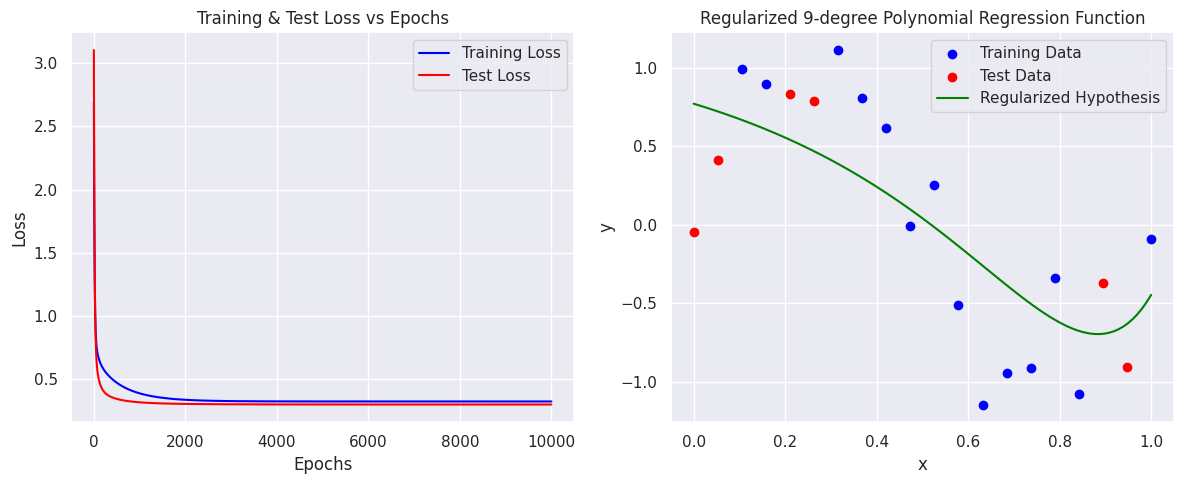

[I 2025-02-17 18:25:50,333] Trial 39 finished with value: 0.29917985063688024 and parameters: {'lambda_reg': 0.03819431653793921}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 0.7704983  -0.88593935 -0.84608534 -0.53343522 -0.23587642 -0.00386014
  0.16892096  0.29177968  0.3815651   0.44662573]
Smallest Loss: 0.32345339458225564 loss at index 9999
Smallest Test Loss: 0.29917985063688024 loss at index 9999

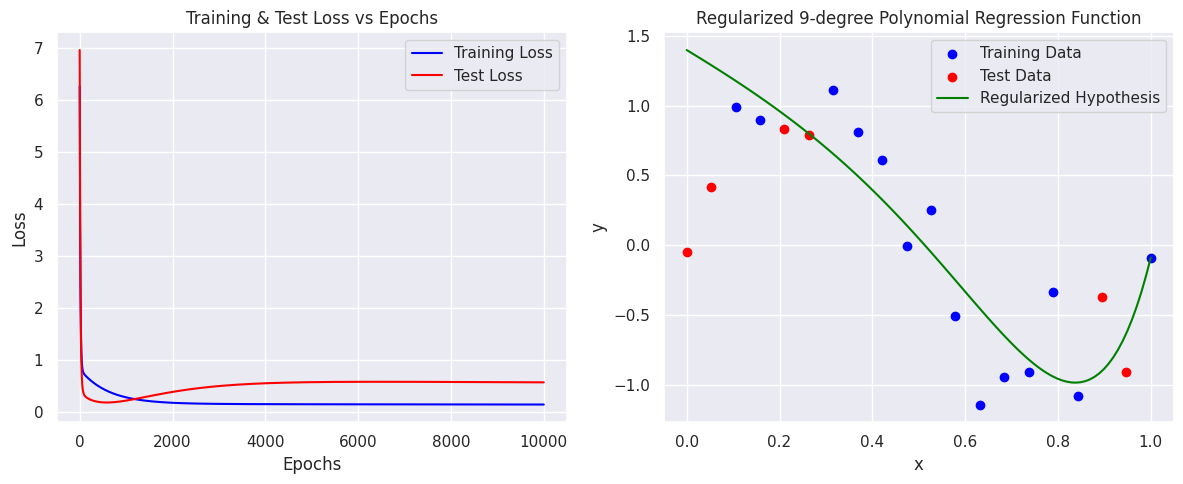

[I 2025-02-17 18:25:50,783] Trial 40 finished with value: 0.17818488295842266 and parameters: {'lambda_reg': 0.00205033001554624}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.39910736 -2.01781973 -0.54623643 -1.45982591 -1.10472708  0.94446943
  0.16364616  1.33832114  0.35967677  0.83488483]
Smallest Loss: 0.13943563402888337 loss at index 9999
Smallest Test Loss: 0.17818488295842266 loss at index 585

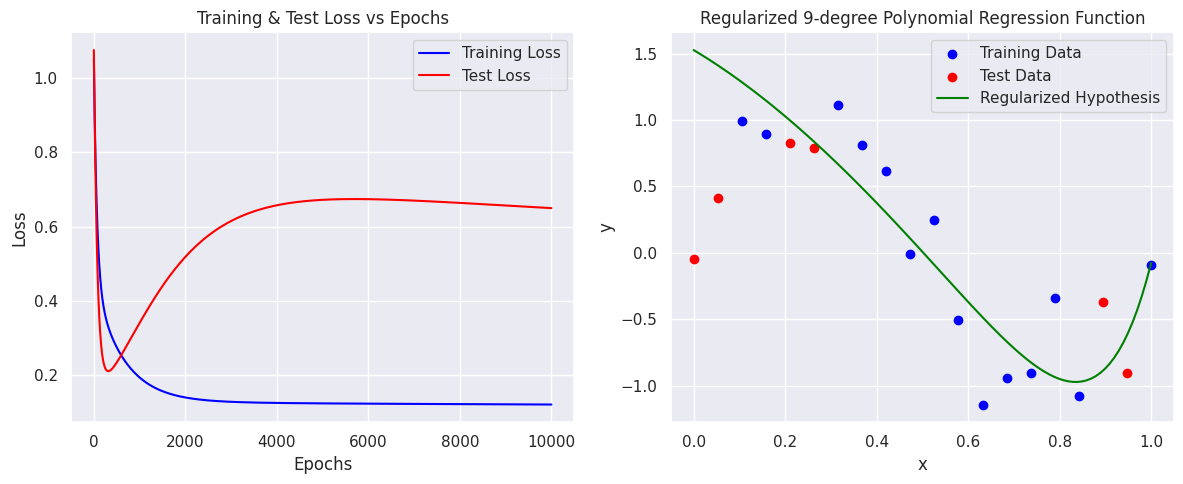

[I 2025-02-17 18:25:51,280] Trial 41 finished with value: 0.21088666162048406 and parameters: {'lambda_reg': 0.00037128399345110906}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.52772802 -2.06207312 -2.24542459  0.32760811  0.32474394  0.45336508
 -0.42847596 -0.04491128  0.08065836  1.98997842]
Smallest Loss: 0.12106016295566488 loss at index 9999
Smallest Test Loss: 0.21088666162048406 loss at index 316

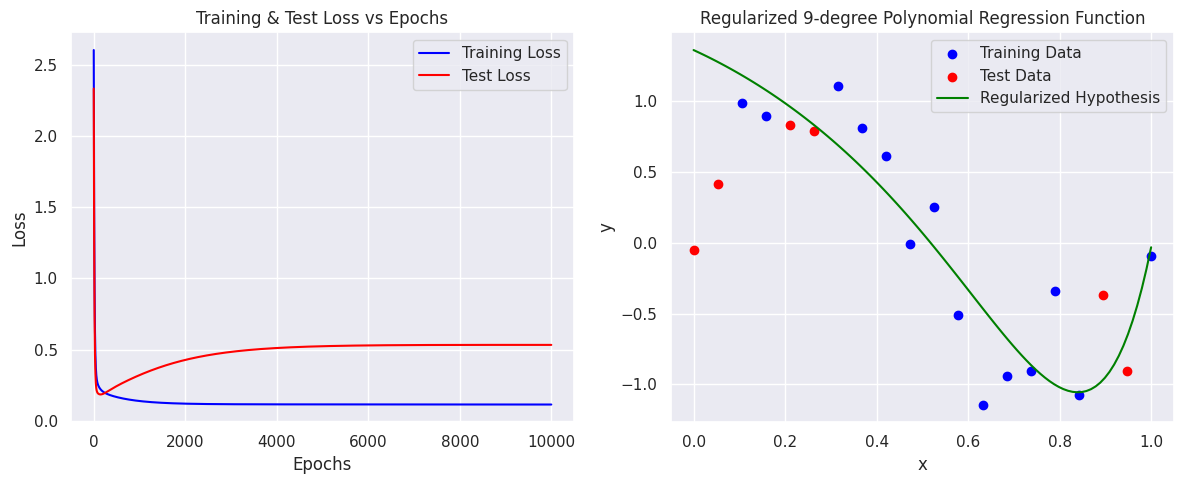

[I 2025-02-17 18:25:51,723] Trial 42 finished with value: 0.18519598190308587 and parameters: {'lambda_reg': 0.0001847926180330171}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.36290973 -1.48767693 -1.87774097 -0.02757566 -1.85018493  0.60476916
  0.73413562  0.89675479 -0.47588967  2.0890597 ]
Smallest Loss: 0.11443872225361529 loss at index 9999
Smallest Test Loss: 0.18519598190308587 loss at index 148

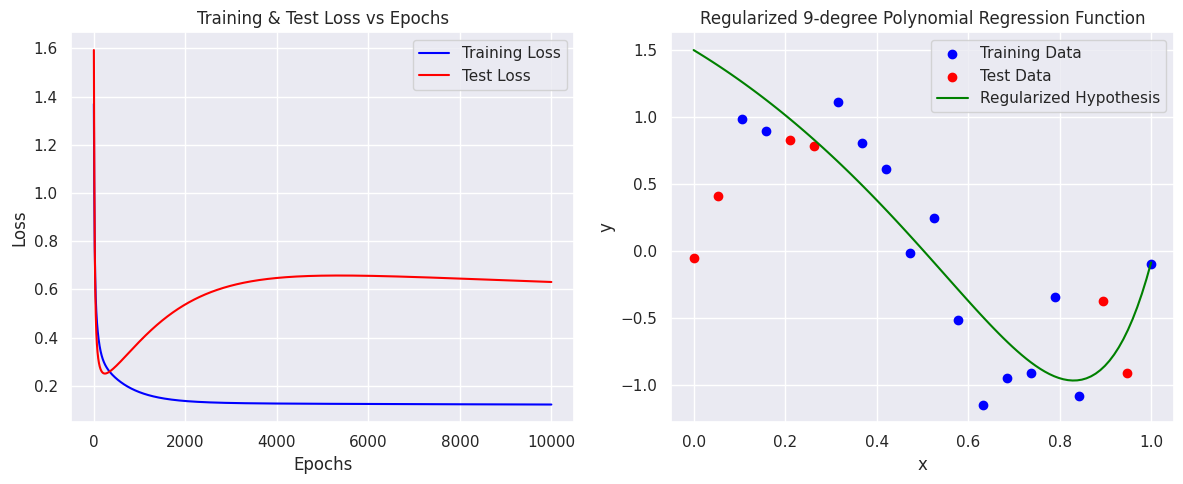

[I 2025-02-17 18:25:52,197] Trial 43 finished with value: 0.2505904874855082 and parameters: {'lambda_reg': 0.0006755383860086079}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.50288734 -2.06816372 -1.70142978 -0.56367064  0.83542177 -1.0019202
  0.48012503  1.10710123  0.95911443  0.3680216 ]
Smallest Loss: 0.12211279382336229 loss at index 9999
Smallest Test Loss: 0.2505904874855082 loss at index 242

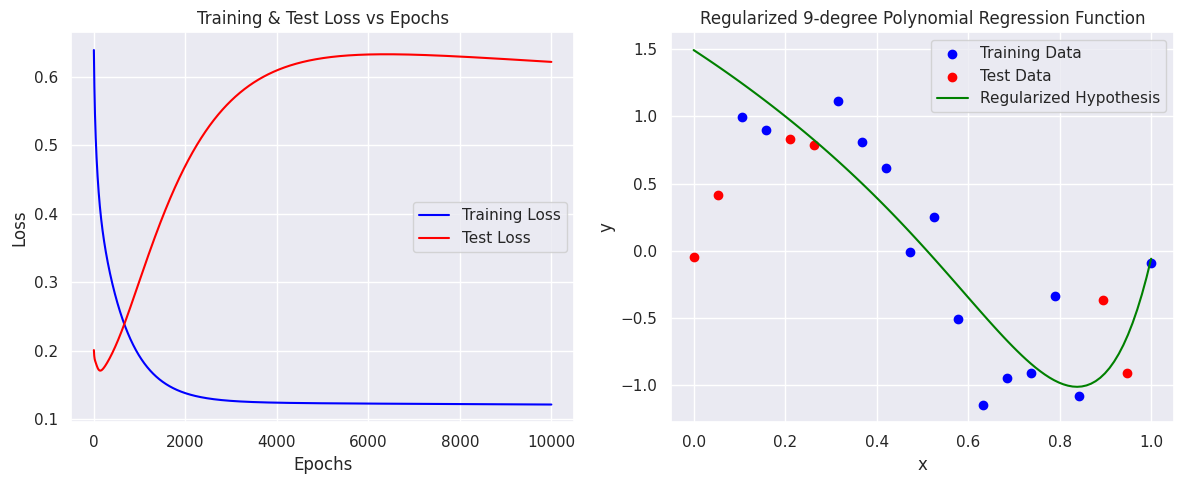

[I 2025-02-17 18:25:52,851] Trial 44 finished with value: 0.1709694794529396 and parameters: {'lambda_reg': 0.0004515748067265874}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.49212313 -2.22624461 -1.10073431 -0.1187369  -0.97354009 -0.10703135
 -0.30756296  1.9671578  -0.07993399  1.39537143]
Smallest Loss: 0.1214553589420023 loss at index 9999
Smallest Test Loss: 0.1709694794529396 loss at index 139

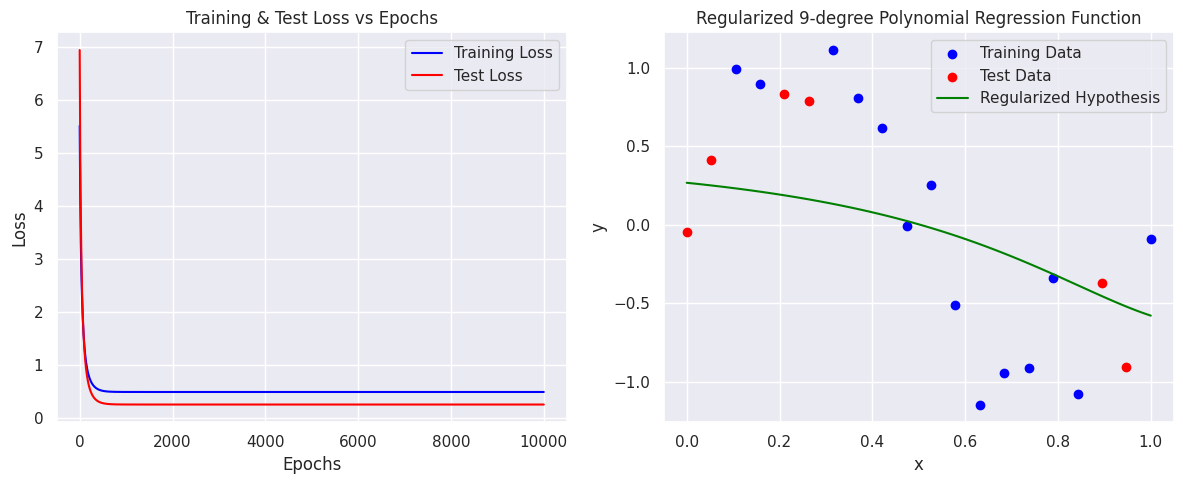

[I 2025-02-17 18:25:53,296] Trial 45 finished with value: 0.25307557595150165 and parameters: {'lambda_reg': 0.2138986320032314}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 0.26745158 -0.30431077 -0.30359022 -0.21578347 -0.12950393 -0.06019138
 -0.00756916  0.03172065  0.06102171  0.08299992]
Smallest Loss: 0.48980164259197656 loss at index 5350
Smallest Test Loss: 0.25307557595150165 loss at index 7427

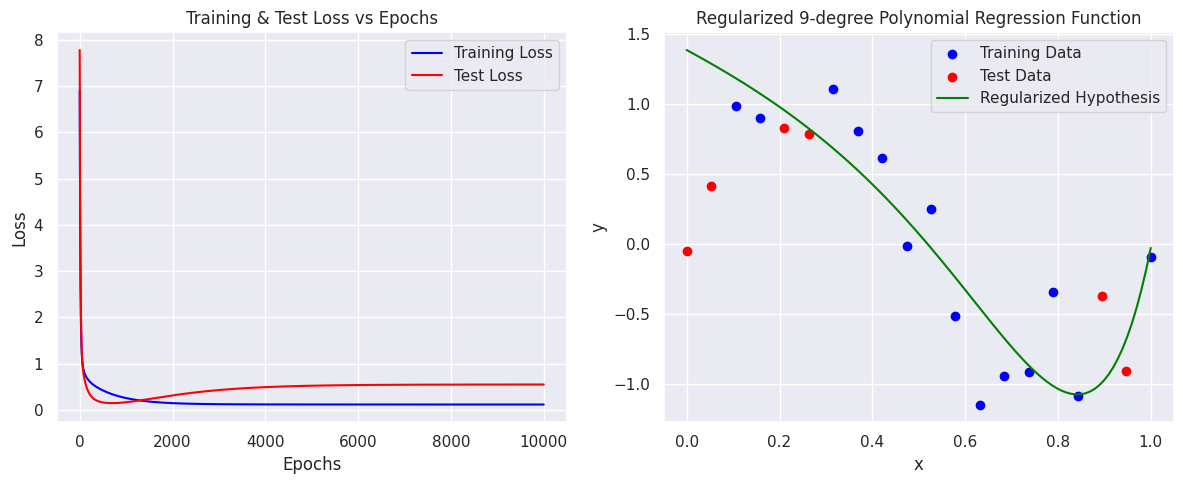

[I 2025-02-17 18:25:53,759] Trial 46 finished with value: 0.14537539549142434 and parameters: {'lambda_reg': 0.0001012853583130678}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.38708284 -1.79411097 -0.88670668 -1.25966949 -1.03891147  0.8179118
 -0.35232681 -0.06002593  2.00369837  1.15795818]
Smallest Loss: 0.11477855310050401 loss at index 9999
Smallest Test Loss: 0.14537539549142434 loss at index 700

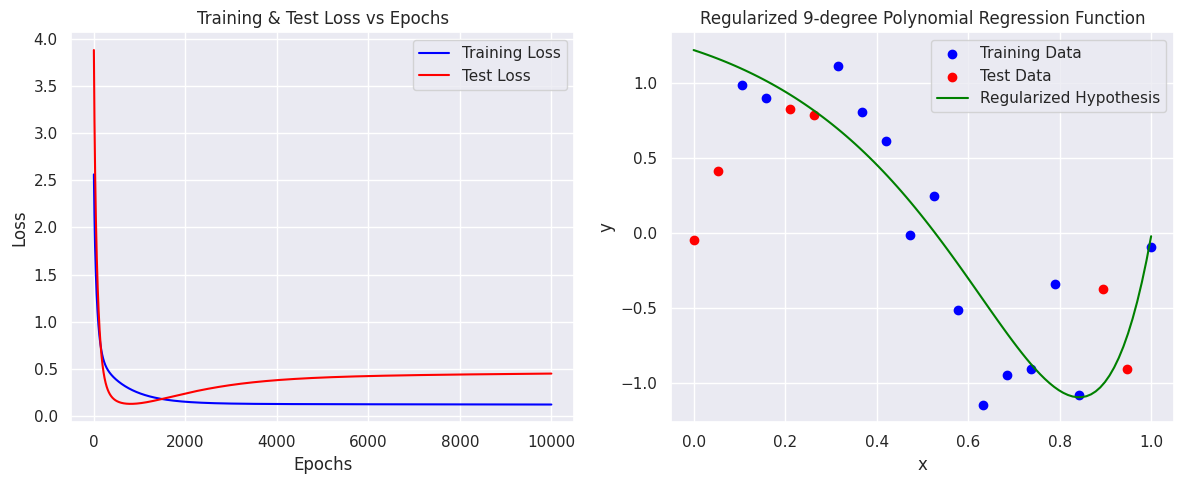

[I 2025-02-17 18:25:54,264] Trial 47 finished with value: 0.1306465128848684 and parameters: {'lambda_reg': 0.0008824907066099216}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.22101522 -0.99995697 -1.66910908 -1.1044127  -0.95338438 -0.80985942
  0.67714878  1.57096548  1.06617239  0.98073173]
Smallest Loss: 0.12363205219454936 loss at index 9999
Smallest Test Loss: 0.1306465128848684 loss at index 804

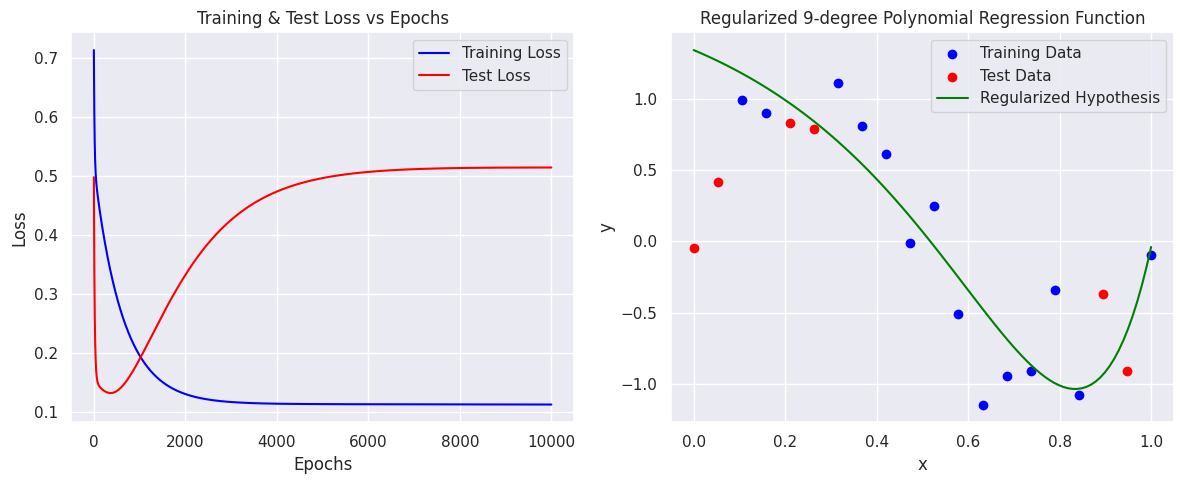

[I 2025-02-17 18:25:54,772] Trial 48 finished with value: 0.13135031648006235 and parameters: {'lambda_reg': 0.00029458556994360515}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.3394964  -1.35406494 -1.73693576 -1.01539464 -1.0206876  -0.32869114
  1.77070536  1.47269821  0.17951299  0.65375309]
Smallest Loss: 0.11191863009726317 loss at index 9999
Smallest Test Loss: 0.13135031648006235 loss at index 365

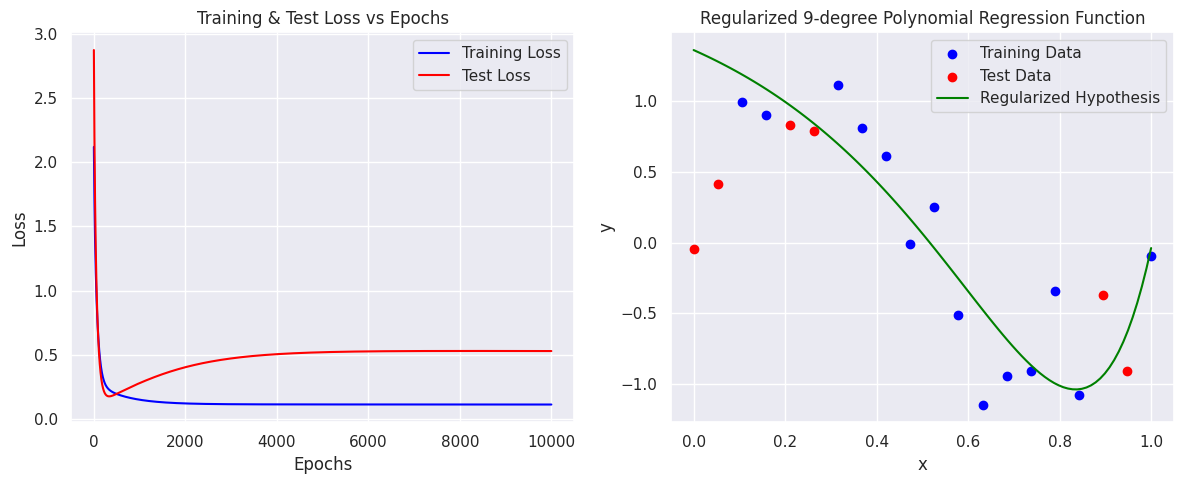

[I 2025-02-17 18:25:55,246] Trial 49 finished with value: 0.1743144267347191 and parameters: {'lambda_reg': 0.00016030982608409487}. Best is trial 28 with value: 0.0835593658374644.

Final weights: [ 1.36072738 -1.44882643 -1.59555685 -1.5074025  -0.25631993  0.60601028
 -0.11167082  0.83680725  1.84559714  0.23271402]
Smallest Loss: 0.11070035843305708 loss at index 9999
Smallest Test Loss: 0.1743144267347191 loss at index 335
Best lambda_reg: 0.0038163140595615526
Best test loss: 0.0835593658374644
Best lambda_reg: 0.0038163140595615526
Best test loss: 0.0835593658374644

/tmp/ipykernel_69330/2963884763.py:19: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)

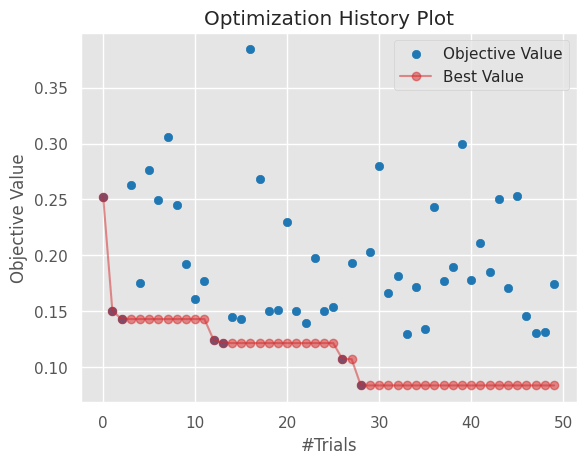

In [40]:
# Set direction to "minimize" as we want to minimize the objective
study = optuna.create_study(direction="minimize")

n_trials = 50

study.optimize(objective, n_trials=50)  # Run the optimization for 100 trials

# Best lambda_reg
best_lambda_reg = study.best_params["lambda_reg"]
print(f"Best lambda_reg: {best_lambda_reg}")
print(f"Best test loss: {study.best_value}")

# Best Batch size
best_lambda_reg = study.best_params["lambda_reg"]
print(f"Best lambda_reg: {best_lambda_reg}")
print(f"Best test loss: {study.best_value}")

# Plot optimization history
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()
